# Hypothesis Statement
## 1.) Oil spills will increase both in volume and number in the next 5 years.
## 2.) Small spills less than 1 barrel will be more common than giant spills of more than 1000 barrels.
## 3.) Most of the spills will be from sabotage/theft and will be happen on land  and swamps habitat.
## 4.) Spills of composition type crude oil will be the most dominant in the next 5 years .
## 5.) There are usually more spills towards the end of the year.

In [2]:
#imports library
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
#plt.style.use('fivethirtyeight')
plt.style.use('classic')
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

# Data collection and wrangling
## 1.) Scrap raw data from the NOSDRA Website, load and organize into Python dataframe.

In [4]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

## 2.) Preliminary data reconnaissance

In [5]:
df0.shape

(15235, 41)

In [6]:
df0.spillareahabitat.value_counts().sort_values()

(Gas)          1
ss,la,iw       1
[Cos]          1
ns,of,sw       1
ss,iw,la       1
iw,co          1
la,la          1
of,ns          1
iw,ss          1
sw,co          1
la,ns,ss       1
iw,la          1
ns,la          1
ss,ns          1
sw,ns,iw       1
sw,ss,iw       1
la,of          1
iw,la,ss       1
other,sw       1
ss,iw,sw       1
sw,co,ns       1
sw,iw,la       1
co,sw,iw       1
iw,sw,of       1
la,iw,sw       1
sw,la,ss       1
co,sw          2
la,ss,sw       2
sw,la,iw       2
ns,iw          2
la,sw,co       2
la,ns          3
la,sw,iw       3
sw,sw          3
iw,sw          3
la,sw,ss       3
ss,sw          8
[Co]           9
ss,la         10
co            10
sw,iw         11
swH           13
sw,la         16
la,iw         16
sw,ss         18
ns            21
la,sw         90
la,ss         90
other         99
iw           160
ss           348
of          1619
sw          5042
la          5838
Name: spillareahabitat, dtype: int64

In [7]:
df0.statesaffected.value_counts().sort_values()

GO                         1
GUSUA                      1
IM,IM                      1
RI,AB                      1
RI,IM                      1
KATSINA                    1
KADUNA-NORTH               1
C R O S S  R I V E R       1
GUSAU                      1
undefined                  1
BA,RI,RI                   1
ZA                         2
BAUCHI                     2
DE,BY                      2
BY,RI                      2
KW                         2
KANO                       2
ZAMFARA                    2
N/A                        2
RI,BY                      3
RI,RI                      4
RI,undefined               4
GOMBE                      4
FC                         9
ON                        12
OG                        15
NI                        21
NIGER                     44
LA                        57
KADUNA                    58
KO                        60
KD                        60
FCT                       71
ED                       167
AB            

In [9]:
df0.lga.value_counts().sort_values()

Kaduna-North                        1
One LGA                             1
Egbado-North                        1
Tsafe                               1
bayelsa                             1
CHIKUN                              1
WARRI SOUTH-WEST                    1
ndokwa east                         1
Shiroro                             1
BRASS                               1
ABOUA                               1
UKWUANI                             1
Umudike                             1
OELGA                               1
AH0DA                               1
Ese-Odo                             1
Ndokwa West                         1
oporoma                             1
One                                 1
AFAM                                1
Emohua                              1
Esan-South-East                     1
river                               1
Ijebu-ode                           1
Doguwa                              1
Okobo                               1
Maru        

In [9]:
df0.company.value_counts().sort_values()

HOGL                                                         1
NNS Naval Base                                               1
Mystery spill reported by Swift Oil, Apapa                   1
AP MOLLER  TERMINALS                                         1
Belema E&P                                                   1
IHS/MTN NIG LTD                                              1
Folawiyo Energy                                              1
Egbin Power plant                                            1
NACO                                                         1
ytd                                                          1
NewCross E&P                                                 1
NIGERIAN PIPELINE AND STORAGE COMPANY                        1
OANDO                                                        1
Nigerian Bottling Company (NBC)                              1
KRPC                                                         1
Guarantee Petroleum Limited                            

In [8]:
df0


id        status   company     incidentnumber incidentdate contaminant estimatedquantity                                   sitelocationname spillareahabitat                       lastupdatedby cause  updatefor   latitude  longitude statesaffected                                        attachments     jivdate               lga zonaloffice certificatedate certificatenumber formadate  reportdate spillstopdate initialcontainmentmeasures                                descriptionofimpact formbdate formcdate                         jivpresent typeoffacility cleanupcompleteddate cleanupmethods cleanupdate quantityrecovered postcleanupinspectiondate finalsamplingdate estimatedspillarea remediationstart remediationtype remediationend postimpactassessmentdate
0           2     confirmed     ADDAX   HSE/OBO/0611/101   2006-11-23          cr               225          Subsea Pipeline @ Mimbo Platform (OML123)               of                              NOSDRA   NaN        NaN        NaN        NaN            NaN                                                NaN         NaN               NaN         NaN             NaN               NaN       NaN         NaN           NaN                        NaN                                                NaN       NaN       NaN                                NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
1           3     confirmed     ADDAX   HSE/OBO/0612/108   2006-12-18          cr               0.5               EBNE04HT @ Ebughu Platform (OML 123)               of                              NOSDRA   eqf        NaN        NaN        NaN            NaN                                                NaN         NaN               NaN         NaN             NaN               NaN       NaN         NaN           NaN                        NaN                                                NaN       NaN       NaN                                NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
2           4     confirmed     ADDAX   HSE/OBO/0612/110   2006-12-27          cr                25                        South East of BOGI Platform               of                              NOSDRA   NaN        NaN        NaN        NaN            NaN                                                NaN         NaN               NaN         NaN             NaN               NaN       NaN         NaN           NaN                        NaN                                                NaN       NaN       NaN                                NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
3           5     confirmed     ADDAX   HSE/OBO/0706/166   2007-05-14          cr                 2                                 Adanga Platform                  of                              NOSDRA   NaN        NaN        NaN        NaN            NaN                                                NaN         NaN               NaN         NaN             NaN               NaN       NaN         NaN           NaN                        NaN                                                NaN       NaN       NaN                                NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
4           6     confirmed     ADDAX   HSE/OBO/0708/201   2007-08-16          gs               NaN                      Izombe Well #10LS 4" Flowline      

In [12]:
df0.lga.isna().sum()

5234

In [13]:
df0.statesaffected.isna().sum()

2411

In [14]:
df0.spillareahabitat.isna().sum()

1765

In [6]:
df0.head(20)

id     status company    incidentnumber incidentdate contaminant estimatedquantity                           sitelocationname spillareahabitat             lastupdatedby   cause  updatefor   latitude  longitude        statesaffected attachments     jivdate  lga zonaloffice certificatedate certificatenumber formadate reportdate spillstopdate initialcontainmentmeasures descriptionofimpact formbdate formcdate jivpresent typeoffacility cleanupcompleteddate cleanupmethods cleanupdate quantityrecovered postcleanupinspectiondate finalsamplingdate estimatedspillarea remediationstart remediationtype remediationend postimpactassessmentdate
0    2  confirmed   ADDAX  HSE/OBO/0611/101   2006-11-23          cr               225  Subsea Pipeline @ Mimbo Platform (OML123)               of                    NOSDRA     NaN        NaN        NaN        NaN                   NaN         NaN         NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
1    3  confirmed   ADDAX  HSE/OBO/0612/108   2006-12-18          cr               0.5       EBNE04HT @ Ebughu Platform (OML 123)               of                    NOSDRA     eqf        NaN        NaN        NaN                   NaN         NaN         NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
2    4  confirmed   ADDAX  HSE/OBO/0612/110   2006-12-27          cr                25                South East of BOGI Platform               of                    NOSDRA     NaN        NaN        NaN        NaN                   NaN         NaN         NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
3    5  confirmed   ADDAX  HSE/OBO/0706/166   2007-05-14          cr                 2                         Adanga Platform                  of                    NOSDRA     NaN        NaN        NaN        NaN                   NaN         NaN         NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
4    6  confirmed   ADDAX  HSE/OBO/0708/201   2007-08-16          gs               NaN              Izombe Well #10LS 4" Flowline               la                    NOSDRA     NaN        NaN        NaN        NaN                   NaN         NaN         NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
5    7  confirmed   ADDAX  HSE/OBO/0708/213   2007-08-30          cr               200    Moni Pulo 12" Pipeline Offshore OML 123               of            

## This shows the first 10 rows of the data

In [7]:
print ("The columns in the dataframe are:", df0.columns.values)

The columns in the dataframe are: ['id' 'status' 'company' 'incidentnumber' 'incidentdate' 'contaminant'
 'estimatedquantity' 'sitelocationname' 'spillareahabitat' 'lastupdatedby'
 'cause' 'updatefor' 'latitude' 'longitude' 'statesaffected' 'attachments'
 'jivdate' 'lga' 'zonaloffice' 'certificatedate' 'certificatenumber'
 'formadate' 'reportdate' 'spillstopdate' 'initialcontainmentmeasures'
 'descriptionofimpact' 'formbdate' 'formcdate' 'jivpresent'
 'typeoffacility' 'cleanupcompleteddate' 'cleanupmethods' 'cleanupdate'
 'quantityrecovered' 'postcleanupinspectiondate' 'finalsamplingdate'
 'estimatedspillarea' 'remediationstart' 'remediationtype'
 'remediationend' 'postimpactassessmentdate']


In [8]:
print ('The data types in each column in the dataframe are:', df0.dtypes)

The data types in each column in the dataframe are: id                              int64
status                         object
company                        object
incidentnumber                 object
incidentdate                   object
contaminant                    object
estimatedquantity              object
sitelocationname               object
spillareahabitat               object
lastupdatedby                  object
cause                          object
updatefor                     float64
latitude                       object
longitude                      object
statesaffected                 object
attachments                    object
jivdate                        object
lga                            object
zonaloffice                    object
certificatedate                object
certificatenumber              object
formadate                      object
reportdate                     object
spillstopdate                  object
initialcontainmentmeasures     objec

### Consistent with the usual data types taken on by data when a json file is imported into python

##  3.) Data cleanup procedures 

### a.) Data relocation, fix some typographical errors
### b.) Removing irrelevant columns, rows
### c.) Changing of data types: Incidentdate   to datetime, estimatedquantity to numeric, category to dummy variables.
### d.) Missing data
### e.) Grouping of data according to variable types
### f.) Upsampling of data from days - weeks, months, quarters, years
### g.) Preparation of data  for Machine learning

In [7]:
print ('The status of the oil spills can fall into any one of this category:', df0['status'].unique())

The status of the oil spills can fall into any one of this category: ['confirmed' 'invalid' 'inconclusive' 'reviewed']


We are only interested in oil spills that were 'confirmed' or 'reviewed', so we will delete spills that are 'invalid' or'inconclusive'

In [8]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [9]:
df1.shape

(14698, 41)

This reduces the number of spills from 14,892 to 14,385. So about 500no. spill falls into the invalid and inconclusive categories.

In [10]:
df1.replace(to_replace = '20014-07-08', value = '2014-07-08', inplace = True) #Replaces a typograpical error

C:\Users\owner\anaconda3\envs\cy\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [11]:
df1.incidentdate.isna().sum()

580

The oil spill incidentdates which will be very vital to our analysis contains 577 empty/missing dates. Some of these missing dates were from errors made while inputing data on the database. From the columns on the dataframe 2 other dates are closely related to the incidentdate which are reportdate and formadate as oil spill are expected to reported within 24hrs of the spill and the report goes into the 'forma'.

In [12]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate

C:\Users\owner\anaconda3\envs\cy\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate

In [14]:
df1.incidentdate.isna().sum()

521

With the above codes we are able to replace 57 rows first with dates from the reportdate column and then from the formadate.

## Deleting irrelevant columns from the dataframe

In [15]:
df2 = df1.filter(items=['company','incidentdate','contaminant','estimatedquantity','spillareahabitat',
                      'cause'])

In [16]:
#Gives the remaining dataframe to include the following columns
df2.tail()

company incidentdate           contaminant estimatedquantity spillareahabitat   cause
15219  Neconde   2021-03-01                    cr                 5               sw     cor
15220     NAOC   2020-12-03                    cr               NaN               la     ome
15221     NAOC   2021-03-15                    no               NaN               ss     eqf
15222   SEPLAT   2021-04-10    other:oil base mud                15               la  other:
15223   SEPLAT   2021-03-21  other:water base mud                20               la     ome

Conversion into the appropriate data type for analysis and machine learning- incidentdate into pandas datetime and estimatedquantity into numeric data types

In [17]:
df2.incidentdate.dtypes

dtype('O')

In [18]:
df2['incidentdate'] = pd.to_datetime(df2['incidentdate'])

In [19]:
df2.incidentdate.dtypes

dtype('<M8[ns]')

In [20]:
df2.estimatedquantity.dtypes

dtype('O')

df2.estimatedquantity.value_counts().sort_index()

In [21]:
df2.estimatedquantity.describe()

count     9421
unique    1683
top          1
freq       523
Name: estimatedquantity, dtype: object

In [22]:
df2.estimatedquantity.isna().sum()

5277

In [23]:
dfnx3 = df2.copy()

In [24]:
#Changes commas after leading zeros to point
dfnx3.loc[dfnx3['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = dfnx3['estimatedquantity'].replace(',', '.',  regex=True)

In [25]:
# Removes the rest commas
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].replace(',', '',  regex=True)

In [29]:
# Removes all texts from the column and returns only numbers
#df2['estimatedquantity'] = df2['estimatedquantity'].str.replace(r'\D', '')

In [26]:
# Removes all texts relating to barrels of oil from the column
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('bbl', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BBL', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Bbl', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Barrel', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BARREL', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('bblS', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BBLS', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('barrels', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Barrels', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('I', '1')

In [27]:
dfnx3.estimatedquantity.dtypes

dtype('O')

In [28]:
dfnx3.estimatedquantity.value_counts().sort_index()

0.0             6
0.00            8
0.0000          1
0.00000001      1
0.0000002       2
0.000001        5
0.000003        3
0.000006        9
0.000008        2
0.00000849      1
0.000009        3
0.00001         2
0.000011        3
0.000013        3
0.000014        1
0.000016        2
0.000019        6
0.00002         2
0.000023        1
0.000025        1
0.000026        1
0.000027        1
0.000031        3
0.000038        2
0.000041        1
0.000047        2
0.00005         4
0.000057        1
0.000063        3
0.0000639       1
0.000082        1
0.000085        1
0.00009         1
0.000094        1
0.0000943       1
0.000096        1
0.0001         53
0.000105        1
0.000108        1
0.0001195       1
0.00013         1
0.000132        1
0.000189        3
0.0002         29
0.000212        1
0.00022         1
0.000226        1
0.00023         1
0.000245        1
0.000252        2
0.0003         30
0.000302        1
0.00031         1
0.000312        1
0.000314        2
0.000315  

In [29]:
dfnx3.estimatedquantity.isna().sum()

5277

In [30]:
dfnx3.estimatedquantity = pd.to_numeric(dfnx3.estimatedquantity, errors = 'coerce')

In [31]:
dfnx3.dtypes

company                      object
incidentdate         datetime64[ns]
contaminant                  object
estimatedquantity           float64
spillareahabitat             object
cause                        object
dtype: object

In [32]:
dfnx3.estimatedquantity.describe()

count     9388.000000
mean        78.738529
std        778.832832
min          0.000000
25%          0.150000
50%          3.000000
75%         15.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

In [33]:
# Gives the classes of contaminant of oil spills
dfnx3.contaminant.unique()

array(['cr', 'gs', 'other:', nan, 'ch', 're', ' ', 'CON', 'con', 'Con',
       'co', 'ga', 'no', 'other: NONE', 'other: (oily water)',
       'other:(oily water)', 're (PMS)', 're (AGO)',
       'other: Non aqueous based mud', 'other:None', 'other:WATER',
       're(pms)', 're(AGO)', 're(PMS)', 'other:DIESEL',
       'other:alleged pollution', 'Diesel', 'other: Oily Water',
       'other:Oily Water', 'other: none', 're(HPFO)', 'oth',
       'other:(oily material)', '0.01', 're(HFO)',
       'other:(used engine oil)', 'other:(circulation sludge)',
       'other:(unknown)', 'other(oily material):',
       'other: (produced water)', 'other: (water based mud)',
       'other: (oily material)', 'other:(oily materia)', 'other:non',
       'other:emulsion', 'other: gaseous emision', 'other:Burnt Gas',
       'other:WATER FROM OIL PIPELINE', 'gas',
       'other:(oily water base on seen appearance)', 'other:oily water',
       'other:water', 'water', 'Asset Damage', 'LPFO',
       'other: Prod

In [34]:
dfnx3.contaminant.value_counts()

cr                                                        9869
other:                                                     644
ga                                                         456
re                                                         425
gs                                                         341
no                                                         308
co                                                         250
CON                                                        131
ch                                                          83
other:(oily water)                                          23
re(PMS)                                                     19
re (PMS)                                                    10
re (AGO)                                                    10
other:(oily material)                                        9
Con                                                          9
re(AGO)                                                

In [35]:
dfnx3.replace({'contaminant' : r'^other.$'}, {'contaminant' : 'other'}, regex=True)

company incidentdate           contaminant  estimatedquantity spillareahabitat   cause
0        ADDAX   2006-11-23                    cr              225.0               of     NaN
1        ADDAX   2006-12-18                    cr                0.5               of     eqf
2        ADDAX   2006-12-27                    cr               25.0               of     NaN
3        ADDAX   2007-05-14                    cr                2.0               of     NaN
4        ADDAX   2007-08-16                    gs                NaN               la     NaN
...        ...          ...                   ...                ...              ...     ...
15219  Neconde   2021-03-01                    cr                5.0               sw     cor
15220     NAOC   2020-12-03                    cr                NaN               la     ome
15221     NAOC   2021-03-15                    no                NaN               ss     eqf
15222   SEPLAT   2021-04-10    other:oil base mud               15.0               la  other:
15223   SEPLAT   2021-03-21  other:water base mud               20.0               la     ome

[14698 rows x 6 columns]

In [36]:
dfnx3['contaminant'] = dfnx3['contaminant'].fillna('notavailable')

In [39]:
dfnx3.loc[dfnx3['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('re'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
dfnx3.loc[dfnx3['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Crude'), 'contaminant'] = 'cr'
dfnx3.loc[dfnx3['contaminant'].str.startswith('crude'), 'contaminant'] = 'cr'



In [40]:
dfnx3.contaminant.value_counts()

cr       9872
na       1996
ga        798
other     768
re        479
co        393
no        308
ch         83
            1
Name: contaminant, dtype: int64

In [41]:
dfnx3.contaminant.isna().sum()

0

From here we filter out oil spills which contaminant is gas because we will be dealing with quantity of barrels of oil spilled.

In [42]:
#Copied the working dataframe to a new dataframe
dfEq = dfnx3.copy()

In [43]:
dfEq = dfEq.loc[dfEq['contaminant'].isin(['cr', 'na','other','re','co',])]

In [44]:
dfEq.contaminant.value_counts()

cr       9872
na       1996
other     768
re        479
co        393
Name: contaminant, dtype: int64

In [47]:
# I checked contaminants who fell under the 'gs' category and found out that this should be under gas (ga)
#df0gs= df0.loc[df0['contaminant'].isin(['gs'])]

In [48]:
#df0gs.tail(20)

In [49]:
#df0gs.estimatedquantity.isna().sum()

In [50]:
#df0gs.shape

# Starting the first Analysis for Estimated Quantity and Spill Number

In [45]:
dfEq = dfEq[['incidentdate', 'estimatedquantity']]

In [48]:
dfEq

incidentdate  estimatedquantity
0       2006-11-23              225.0
1       2006-12-18                0.5
2       2006-12-27               25.0
3       2007-05-14                2.0
5       2007-08-30              200.0
...            ...                ...
15218   2021-03-14               60.0
15219   2021-03-01                5.0
15220   2020-12-03                NaN
15222   2021-04-10               15.0
15223   2021-03-21               20.0

[13508 rows x 2 columns]

In [47]:
dfEq.isna().sum()

incidentdate          501
estimatedquantity    4204
dtype: int64

# Dealing with missing values- Checking for the best apporach

Looking at using monthly mean/median, mean of seasonal counterparts(if the series have seasonality)

In [49]:
dfEq.estimatedquantity.describe()

count     9304.000000
mean        79.116971
std        782.127433
min          0.000000
25%          0.160000
50%          3.000000
75%         15.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

Cut off data points before 2004 and for the year 2020

In [55]:
dfEq1c = dfEq.loc[dfEq['incidentdate'] < '2005']

In [56]:
dfEq1c.incidentdate.value_counts().sort_values()

1994-05-07    1
2004-10-13    1
2002-07-24    1
1991-09-25    1
2003-06-28    1
2004-08-02    1
1994-08-27    1
2001-06-14    1
2001-10-04    1
2001-05-20    1
2002-11-17    1
2004-03-29    1
2004-07-23    1
2003-06-24    1
2004-03-30    1
1994-08-01    1
2001-10-03    1
2003-10-29    1
2002-06-18    1
2004-10-05    1
2003-10-15    1
2004-12-18    1
2004-03-05    2
1990-10-17    2
Name: incidentdate, dtype: int64

In [57]:
dfEq1c.isna().sum()

incidentdate          0
estimatedquantity    24
dtype: int64

In [50]:
#dfEq1 = dfEq.loc[dfEq['incidentdate'] > '2004']
#dfEq1 = dfEq1.loc[dfEq1['incidentdate'] < '2020']
dfEq1 = dfEq.loc[(dfEq['incidentdate'] > '2005-12-31') & (dfEq['incidentdate'] < '2021-3-31')]

In [51]:
dfEq1.estimatedquantity.describe()

count     9150.000000
mean        79.358300
std        788.096319
min          0.000000
25%          0.170000
50%          3.000000
75%         15.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

< 1 barrel, < 15 barrels, >15 barrels

dfEq_lt1 = dfEq1.loc[dfEq1['estimatedquantity'] < 1]
#dfEq_lt15 = dfEq1.loc[dfEq1['estimatedquantity'] > 1]
#dfEq_lt15 = dfEq_lt15.loc[dfEq_lt15['estimatedquantity'] < 15]
dfEq_gt15 = dfEq1.loc[dfEq1['estimatedquantity'] > 15]

dfEq_lt15 = dfEq1.loc[(dfEq1['estimatedquantity'] > 1) & (dfEq1['estimatedquantity'] < 15)]

dfEq_lt15.describe()

dfEq_lt1.describe()

dfEq_gt15.describe()

In [1]:
dfEqM = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfEqY = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])
#dfEqW = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='W')])['estimatedquantity'].agg(['sum','size'])
#dfEqD = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='D')])['estimatedquantity'].agg(['sum','size'])
#dfEqQ = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='Q')])['estimatedquantity'].agg(['sum','size'])

NameError: name 'dfEq1' is not defined

In [53]:
dfEqM = dfEqM.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
#dfEqY = dfEqY.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
#dfEqW = dfEqW.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
#dfEqD = dfEqD.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
#dfEqQ = dfEqQ.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

In [54]:
dfEqM_YM = dfEqM.reset_index()
#dfEqY_YM = dfEqY.reset_index()
#dfEqW_YM = dfEqW.reset_index()
#dfEqD_YM = dfEqD.reset_index()
#dfEqQ_YM = dfEqQ.reset_index()

In [58]:
dfEqM['spillno'].describe()

count    183.000000
mean      70.158470
std       34.059451
min        9.000000
25%       47.000000
50%       66.000000
75%       87.000000
max      186.000000
Name: spillno, dtype: float64

In [59]:
dfEqM_YM['Year'] = dfEqM_YM['incidentdate'].dt.year
dfEqM_YM['Month'] = dfEqM_YM['incidentdate'].dt.month_name()

#dfEqY_YM['Year'] = dfEqY_YM['incidentdate'].dt.year
#dfEqY_YM['Month'] = dfEqY_YM['incidentdate'].dt.month

#dfEqW_YM['Year'] = dfEqW_YM['incidentdate'].dt.year
#dfEqW_YM['Month'] = dfEqW_YM['incidentdate'].dt.month

#dfEqD_YM['Year'] = dfEqD_YM['incidentdate'].dt.year
#dfEqD_YM['Month'] = dfEqD_YM['incidentdate'].dt.month

#dfEqQ_YM['Year'] = dfEqQ_YM['incidentdate'].dt.year
#dfEqQ_YM['Month'] = dfEqQ_YM['incidentdate'].dt.month

In [92]:
dx = dfEqM_YM.copy()

In [95]:
dx

incidentdate  estimatedqty  spillno  Year      Month
0     2006-01-31     25.486900       11  2006    January
1     2006-02-28    649.284000       10  2006   February
2     2006-03-31   2504.103000        9  2006      March
3     2006-04-30     51.225000       14  2006      April
4     2006-05-31    947.195400       29  2006        May
5     2006-06-30   1585.290200       37  2006       June
6     2006-07-31   1654.480300       45  2006       July
7     2006-08-31  10151.888900       43  2006     August
8     2006-09-30     79.067000       41  2006  September
9     2006-10-31   3136.680000       40  2006    October
10    2006-11-30   3415.381500       40  2006   November
11    2006-12-31    436.204800       47  2006   December
12    2007-01-31   2122.033000       64  2007    January
13    2007-02-28   7764.832000      118  2007   February
14    2007-03-31   7295.397400       71  2007      March
15    2007-04-30  17188.650500       75  2007      April
16    2007-05-31   6016.993800      112  2007        May
17    2007-06-30   9288.174400       87  2007       June
18    2007-07-31  10788.324700       87  2007       July
19    2007-08-31   3826.283200       55  2007     August
20    2007-09-30    704.929900       60  2007  September
21    2007-10-31    794.687600       80  2007    October
22    2007-11-30   1751.410700       67  2007   November
23    2007-12-31   1626.219500       74  2007   December
24    2008-01-31  57005.363900       84  2008    January
25    2008-02-29   1070.451300       66  2008   February
26    2008-03-31   1240.232900       70  2008      March
27    2008-04-30   4358.745000       96  2008      April
28    2008-05-31   6536.866700       86  2008        May
29    2008-06-30   1035.929400       81  2008       June
30    2008-07-31   2856.087600       88  2008       July
31    2008-08-31   6317.343340      103  2008     August
32    2008-09-30   1230.024680       81  2008  September
33    2008-10-31   1926.578860       71  2008    October
34    2008-11-30   2618.168340       91  2008   November
35    2008-12-31  10651.457100       69  2008   December
36    2009-01-31    946.847600       66  2009    January
37    2009-02-28    779.257600       64  2009   February
38    2009-03-31    752.425100       92  2009      March
39    2009-04-30    198.046300       60  2009      April
40    2009-05-31   2413.086300       75  2009        May
41    2009-06-30  13835.444500       75  2009       June
42    2009-07-31   2828.580300       79  2009       July
43    2009-08-31   5803.742000       63  2009     August
44    2009-09-30   1357.139600       66  2009  September
45    2009-10-31    519.831400       66  2009    October
46    2009-11-30   3113.781500       53  2009   November
47    2009-12-31   6461.958100       70  2009   December
48    2010-01-31   1794.503800       78  2010    January
49    2010-02-28   2352.026900       66  2010   February
50    2010-03-31   1902.682900       57  2010      March
51    2010-04-30   3340.085100       68  2010      April
52    2010-05-31   4566.041200      106  2010        May
53    2010-06-30   7430.822700       65  2010       June
54    2010-07-31   2325.255000       62  2010       July
55    2010-08-31  11031.616300       86  2010     August
56    2010-09-30   5163.908100       63  2010  September
57    2010-10-31   2095.653800       71  2010    October
58    2010-11-30   2047.281300       62  2010   November
59    2010-12-31   2999.623400       69  2010   December
60    2011-01-31   1480.340300       56  2011    January
61    2011-02-28   6384.066600       51  2011   February
62    2011-03-31   1835.171600      100  2011      March
63    2011-04-30    751.008100       43  2011      April
64    2011-05-31   1172.096000       86  2011        May
65    2011-06-30   4861.704000       93  2011       June
66    2011-07-31   1561.370600       91  2011       July
67    2011-08-31   2638.267400      105  2011     August
68    2011-09-30   1147.657400       96  2011  September
69    2011-10-

In [96]:
dfM1 = dx[['incidentdate','spillno','Year','month','Month']]

In [97]:
dfM1

incidentdate  spillno  Year      Month
0     2006-01-31       11  2006    January
1     2006-02-28       10  2006   February
2     2006-03-31        9  2006      March
3     2006-04-30       14  2006      April
4     2006-05-31       29  2006        May
5     2006-06-30       37  2006       June
6     2006-07-31       45  2006       July
7     2006-08-31       43  2006     August
8     2006-09-30       41  2006  September
9     2006-10-31       40  2006    October
10    2006-11-30       40  2006   November
11    2006-12-31       47  2006   December
12    2007-01-31       64  2007    January
13    2007-02-28      118  2007   February
14    2007-03-31       71  2007      March
15    2007-04-30       75  2007      April
16    2007-05-31      112  2007        May
17    2007-06-30       87  2007       June
18    2007-07-31       87  2007       July
19    2007-08-31       55  2007     August
20    2007-09-30       60  2007  September
21    2007-10-31       80  2007    October
22    2007-11-30       67  2007   November
23    2007-12-31       74  2007   December
24    2008-01-31       84  2008    January
25    2008-02-29       66  2008   February
26    2008-03-31       70  2008      March
27    2008-04-30       96  2008      April
28    2008-05-31       86  2008        May
29    2008-06-30       81  2008       June
30    2008-07-31       88  2008       July
31    2008-08-31      103  2008     August
32    2008-09-30       81  2008  September
33    2008-10-31       71  2008    October
34    2008-11-30       91  2008   November
35    2008-12-31       69  2008   December
36    2009-01-31       66  2009    January
37    2009-02-28       64  2009   February
38    2009-03-31       92  2009      March
39    2009-04-30       60  2009      April
40    2009-05-31       75  2009        May
41    2009-06-30       75  2009       June
42    2009-07-31       79  2009       July
43    2009-08-31       63  2009     August
44    2009-09-30       66  2009  September
45    2009-10-31       66  2009    October
46    2009-11-30       53  2009   November
47    2009-12-31       70  2009   December
48    2010-01-31       78  2010    January
49    2010-02-28       66  2010   February
50    2010-03-31       57  2010      March
51    2010-04-30       68  2010      April
52    2010-05-31      106  2010        May
53    2010-06-30       65  2010       June
54    2010-07-31       62  2010       July
55    2010-08-31       86  2010     August
56    2010-09-30       63  2010  September
57    2010-10-31       71  2010    October
58    2010-11-30       62  2010   November
59    2010-12-31       69  2010   December
60    2011-01-31       56  2011    January
61    2011-02-28       51  2011   February
62    2011-03-31      100  2011      March
63    2011-04-30       43  2011      April
64    2011-05-31       86  2011        May
65    2011-06-30       93  2011       June
66    2011-07-31       91  2011       July
67    2011-08-31      105  2011     August
68    2011-09-30       96  2011  September
69    2011-10-31       99  2011    October
70    2011-11-30      110  2011   November
71    2011-12-31       90  2011   December
72    2012-01-31       90  2012    January
73    2012-02-29       76  2012   February
74    2012-03-31       74  2012      March
75    2012-04-30       83  2012      April
76    2012-05-31      115  2012        May
77    2012-06-30      110  2012       June
78    2012-07-31       96  2012       July
79    2012-08-31       94  2012     August
80    2012-09-30       67  2012  September
81    2012-10-31       74  2012    October
82    2012-11-30       92  2012   November
83    2012-12-31       74  2012   December
84    2013-01-31       74  2013    January
85    2013-02-28       89  2013   February
86    2013-03-31      121  2013      March
87    2013-04-30       94  2013      April
88    2013-05-31      156  2013        May
89    2013-06-30      132  2013       June
90    2013-07-31      139  2013       July
91    2013-08-31      141  2013     August
92   

In [67]:
pv = pd.pivot_table(dfM1, index  = ['Month'], columns = ['Year'], values = ['spillno'] )

In [68]:
pv

spillno                                                                                                 
Year     2006   2007   2008  2009   2010   2011   2012   2013   2014  2015  2016  2017  2018  2019  2020  2021
Month                                                                                                         
1        11.0   64.0   84.0  66.0   78.0   56.0   90.0   74.0  186.0  70.0  72.0  51.0  50.0  65.0  43.0  17.0
2        10.0  118.0   66.0  64.0   66.0   51.0   76.0   89.0  138.0  82.0  43.0  41.0  47.0  44.0  27.0  17.0
3         9.0   71.0   70.0  92.0   57.0  100.0   74.0  121.0  150.0  83.0  52.0  54.0  52.0  47.0  30.0  14.0
4        14.0   75.0   96.0  60.0   68.0   43.0   83.0   94.0  143.0  84.0  39.0  30.0  49.0  65.0  29.0   NaN
5        29.0  112.0   86.0  75.0  106.0   86.0  115.0  156.0  183.0  91.0  52.0  41.0  69.0  51.0  24.0   NaN
6        37.0   87.0   81.0  75.0   65.0   93.0  110.0  132.0  107.0  81.0  57.0  66.0  58.0  57.0  29.0   NaN
7        45.0   87.0   88.0  79.0   62.0   91.0   96.0  139.0  127.0  58.0  70.0  69.0  67.0  51.0  23.0   NaN
8        43.0   55.0  103.0  63.0   86.0  105.0   94.0  141.0  121.0  67.0  68.0  42.0  54.0  59.0  24.0   NaN
9        41.0   60.0   81.0  66.0   63.0   96.0   67.0  125.0  102.0  66.0  59.0  33.0  46.0  53.0  16.0   NaN
10       40.0   80.0   71.0  66.0   71.0   99.0   74.0  159.0   83.0  65.0  66.0  32.0  47.0  45.0  14.0   NaN
11       40.0   67.0   91.0  53.0   62.0  110.0   92.0  165.0   97.0  93.0  52.0  44.0  70.0  34.0  23.0   NaN
12       47.0   74.0   69.0  70.0   69.0   90.0   74.0  167.0   77.0  56.0  33.0  35.0  39.0  49.0  19.0   NaN

In [104]:
pv1 = pd.pivot_table(dfM1, index  = ['month'], columns = ['Year'], values = ['spillno'] )

In [105]:
pv1

spillno                                                                                                 
Year     2006   2007   2008  2009   2010   2011   2012   2013   2014  2015  2016  2017  2018  2019  2020  2021
month                                                                                                         
Apr      14.0   75.0   96.0  60.0   68.0   43.0   83.0   94.0  143.0  84.0  39.0  30.0  49.0  65.0  29.0   NaN
Aug      43.0   55.0  103.0  63.0   86.0  105.0   94.0  141.0  121.0  67.0  68.0  42.0  54.0  59.0  24.0   NaN
Dec      47.0   74.0   69.0  70.0   69.0   90.0   74.0  167.0   77.0  56.0  33.0  35.0  39.0  49.0  19.0   NaN
Feb      10.0  118.0   66.0  64.0   66.0   51.0   76.0   89.0  138.0  82.0  43.0  41.0  47.0  44.0  27.0  17.0
Jan      11.0   64.0   84.0  66.0   78.0   56.0   90.0   74.0  186.0  70.0  72.0  51.0  50.0  65.0  43.0  17.0
Jul      45.0   87.0   88.0  79.0   62.0   91.0   96.0  139.0  127.0  58.0  70.0  69.0  67.0  51.0  23.0   NaN
Jun      37.0   87.0   81.0  75.0   65.0   93.0  110.0  132.0  107.0  81.0  57.0  66.0  58.0  57.0  29.0   NaN
Mar       9.0   71.0   70.0  92.0   57.0  100.0   74.0  121.0  150.0  83.0  52.0  54.0  52.0  47.0  30.0  14.0
May      29.0  112.0   86.0  75.0  106.0   86.0  115.0  156.0  183.0  91.0  52.0  41.0  69.0  51.0  24.0   NaN
Nov      40.0   67.0   91.0  53.0   62.0  110.0   92.0  165.0   97.0  93.0  52.0  44.0  70.0  34.0  23.0   NaN
Oct      40.0   80.0   71.0  66.0   71.0   99.0   74.0  159.0   83.0  65.0  66.0  32.0  47.0  45.0  14.0   NaN
Sep      41.0   60.0   81.0  66.0   63.0   96.0   67.0  125.0  102.0  66.0  59.0  33.0  46.0  53.0  16.0   NaN

In [106]:
pv1= pv1.reindex(index = dfM1.month.unique())

In [107]:
pv1

spillno                                                                                                 
Year     2006   2007   2008  2009   2010   2011   2012   2013   2014  2015  2016  2017  2018  2019  2020  2021
month                                                                                                         
Jan      11.0   64.0   84.0  66.0   78.0   56.0   90.0   74.0  186.0  70.0  72.0  51.0  50.0  65.0  43.0  17.0
Feb      10.0  118.0   66.0  64.0   66.0   51.0   76.0   89.0  138.0  82.0  43.0  41.0  47.0  44.0  27.0  17.0
Mar       9.0   71.0   70.0  92.0   57.0  100.0   74.0  121.0  150.0  83.0  52.0  54.0  52.0  47.0  30.0  14.0
Apr      14.0   75.0   96.0  60.0   68.0   43.0   83.0   94.0  143.0  84.0  39.0  30.0  49.0  65.0  29.0   NaN
May      29.0  112.0   86.0  75.0  106.0   86.0  115.0  156.0  183.0  91.0  52.0  41.0  69.0  51.0  24.0   NaN
Jun      37.0   87.0   81.0  75.0   65.0   93.0  110.0  132.0  107.0  81.0  57.0  66.0  58.0  57.0  29.0   NaN
Jul      45.0   87.0   88.0  79.0   62.0   91.0   96.0  139.0  127.0  58.0  70.0  69.0  67.0  51.0  23.0   NaN
Aug      43.0   55.0  103.0  63.0   86.0  105.0   94.0  141.0  121.0  67.0  68.0  42.0  54.0  59.0  24.0   NaN
Sep      41.0   60.0   81.0  66.0   63.0   96.0   67.0  125.0  102.0  66.0  59.0  33.0  46.0  53.0  16.0   NaN
Oct      40.0   80.0   71.0  66.0   71.0   99.0   74.0  159.0   83.0  65.0  66.0  32.0  47.0  45.0  14.0   NaN
Nov      40.0   67.0   91.0  53.0   62.0  110.0   92.0  165.0   97.0  93.0  52.0  44.0  70.0  34.0  23.0   NaN
Dec      47.0   74.0   69.0  70.0   69.0   90.0   74.0  167.0   77.0  56.0  33.0  35.0  39.0  49.0  19.0   NaN

In [108]:
pv1.describe()

spillno                                                                                                                                                                            
Year        2006        2007        2008       2009        2010        2011        2012        2013        2014       2015       2016       2017       2018       2019       2020       2021
count  12.000000   12.000000   12.000000  12.000000   12.000000   12.000000   12.000000   12.000000   12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   3.000000
mean   30.500000   79.166667   82.166667  69.083333   71.083333   85.000000   87.083333  130.166667  126.166667  74.666667  55.250000  44.833333  54.000000  51.666667  25.083333  16.000000
std    15.102679   19.422730   11.543068  10.121609   13.466850   22.266975   15.138502   30.948148   35.562578  12.536009  12.556237  12.840514   9.990905   8.967956   7.585373   1.732051
min     9.000000   55.000000   66.000000  53.000000   57.000000   43.000000   67.000000   74.000000   77.000000  56.000000  33.000000  30.000000  39.000000  34.000000  14.000000  14.000000
25%    13.250000   66.250000   70.750000  63.750000   62.750000   78.500000   74.000000  114.250000  100.750000  65.750000  49.750000  34.500000  47.000000  46.500000  22.000000  15.500000
50%    38.500000   74.500000   82.500000  66.000000   67.000000   92.000000   86.500000  135.500000  124.000000  75.500000  54.500000  41.500000  51.000000  51.000000  24.000000  17.000000
75%    41.500000   87.000000   88.750000  75.000000   72.750000   99.250000   94.500000  156.750000  144.750000  83.250000  66.500000  51.750000  60.250000  57.500000  29.000000  17.000000
max    47.000000  118.000000  103.000000  92.000000  106.000000  110.000000  115.000000  167.000000  186.000000  93.000000  72.000000  69.000000  70.000000  65.000000  43.000000  17.000000

In [110]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

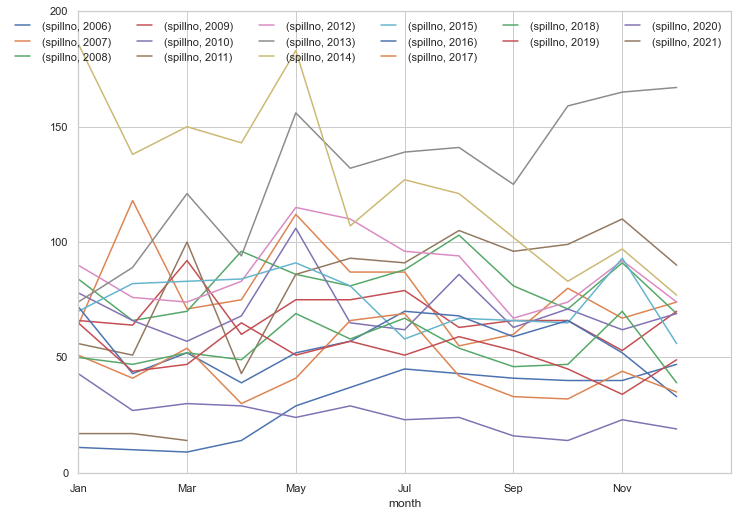

In [111]:
x = pv1.plot(kind='line').legend(ncol=6,frameon=False)


from statsmodels.tsa.seasonal import seasonal_decompose
series = ...
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

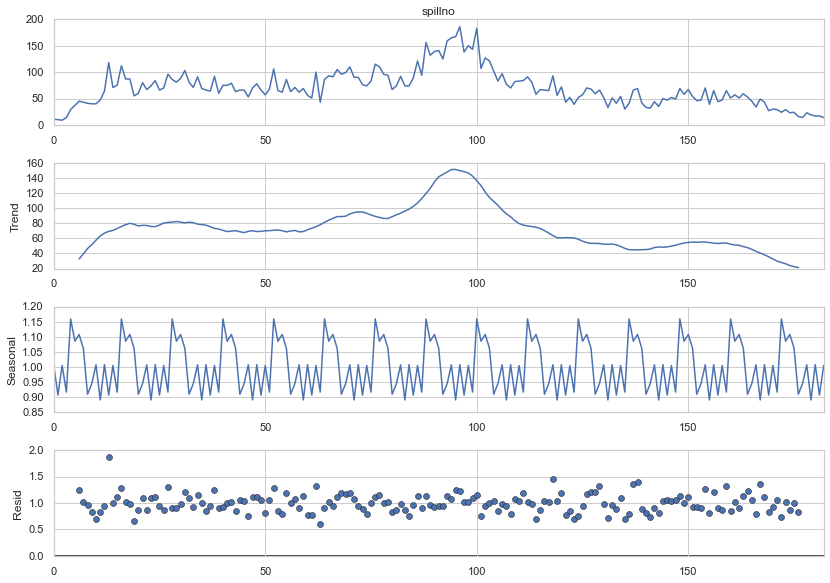

In [114]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = dfM1.spillno
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
pyplot.show()

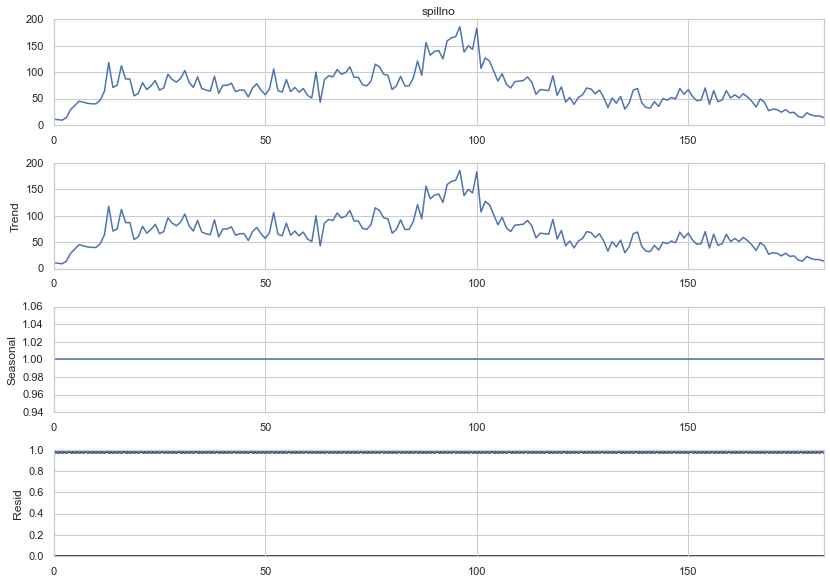

In [120]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = dfM1.spillno
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

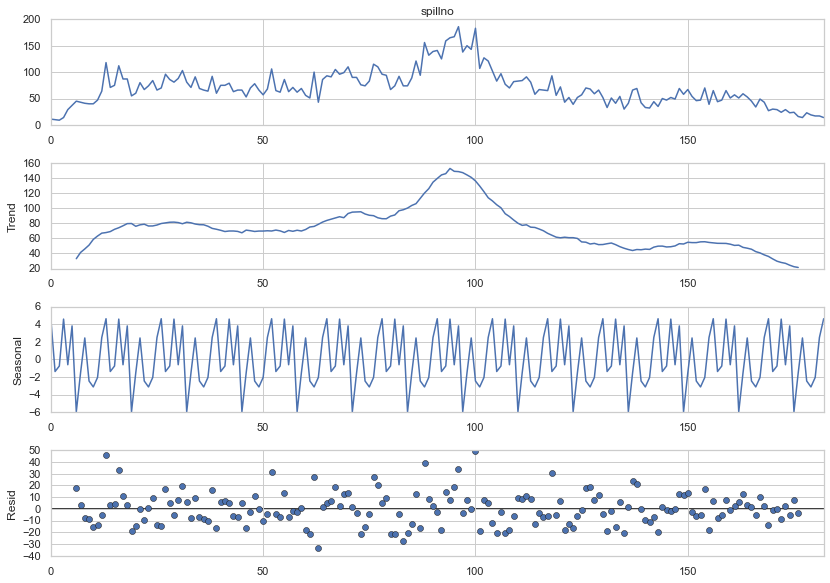

In [130]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = dfM1.spillno
result = seasonal_decompose(series, model='additive', period=13)
result.plot()
pyplot.show()

In [112]:
dfM1

incidentdate  spillno  Year      Month month
0     2006-01-31       11  2006    January   Jan
1     2006-02-28       10  2006   February   Feb
2     2006-03-31        9  2006      March   Mar
3     2006-04-30       14  2006      April   Apr
4     2006-05-31       29  2006        May   May
5     2006-06-30       37  2006       June   Jun
6     2006-07-31       45  2006       July   Jul
7     2006-08-31       43  2006     August   Aug
8     2006-09-30       41  2006  September   Sep
9     2006-10-31       40  2006    October   Oct
10    2006-11-30       40  2006   November   Nov
11    2006-12-31       47  2006   December   Dec
12    2007-01-31       64  2007    January   Jan
13    2007-02-28      118  2007   February   Feb
14    2007-03-31       71  2007      March   Mar
15    2007-04-30       75  2007      April   Apr
16    2007-05-31      112  2007        May   May
17    2007-06-30       87  2007       June   Jun
18    2007-07-31       87  2007       July   Jul
19    2007-08-31       55  2007     August   Aug
20    2007-09-30       60  2007  September   Sep
21    2007-10-31       80  2007    October   Oct
22    2007-11-30       67  2007   November   Nov
23    2007-12-31       74  2007   December   Dec
24    2008-01-31       84  2008    January   Jan
25    2008-02-29       66  2008   February   Feb
26    2008-03-31       70  2008      March   Mar
27    2008-04-30       96  2008      April   Apr
28    2008-05-31       86  2008        May   May
29    2008-06-30       81  2008       June   Jun
30    2008-07-31       88  2008       July   Jul
31    2008-08-31      103  2008     August   Aug
32    2008-09-30       81  2008  September   Sep
33    2008-10-31       71  2008    October   Oct
34    2008-11-30       91  2008   November   Nov
35    2008-12-31       69  2008   December   Dec
36    2009-01-31       66  2009    January   Jan
37    2009-02-28       64  2009   February   Feb
38    2009-03-31       92  2009      March   Mar
39    2009-04-30       60  2009      April   Apr
40    2009-05-31       75  2009        May   May
41    2009-06-30       75  2009       June   Jun
42    2009-07-31       79  2009       July   Jul
43    2009-08-31       63  2009     August   Aug
44    2009-09-30       66  2009  September   Sep
45    2009-10-31       66  2009    October   Oct
46    2009-11-30       53  2009   November   Nov
47    2009-12-31       70  2009   December   Dec
48    2010-01-31       78  2010    January   Jan
49    2010-02-28       66  2010   February   Feb
50    2010-03-31       57  2010      March   Mar
51    2010-04-30       68  2010      April   Apr
52    2010-05-31      106  2010        May   May
53    2010-06-30       65  2010       June   Jun
54    2010-07-31       62  2010       July   Jul
55    2010-08-31       86  2010     August   Aug
56    2010-09-30       63  2010  September   Sep
57    2010-10-31       71  2010    October   Oct
58    2010-11-30       62  2010   November   Nov
59    2010-12-31       69  2010   December   Dec
60    2011-01-31       56  2011    January   Jan
61    2011-02-28       51  2011   February   Feb
62    2011-03-31      100  2011      March   Mar
63    2011-04-30       43  2011      April   Apr
64    2011-05-31       86  2011        May   May
65    2011-06-30       93  2011       June   Jun
66    2011-07-31       91  2011       July   Jul
67    2011-08-31      105  2011     August   Aug
68    2011-09-30       96  2011  September   Sep
69    2011-10-31       99  2011    October   Oct
70    2011-11-30      110  2011   November   Nov
71    2011-12-31       90  2011   December   Dec
72    2012-01-31       90  2012    January   Jan
73    2012-02-29       76  2012   February   Feb
74    2012-03-31       74  2012      March   Mar
75    2012-04-30       83  2012      April   Apr
76    2012-05-31      115  2012        May   May
77    2012-06-30      110  2012       June   Jun
78    2012-07-31       96  2012       July   Jul
79    2012-08-31       94  2012     August   Aug
80    2012-09-30       67  2012  Se

In [123]:
dfm =dfM1[['incidentdate','spillno']]

In [125]:
dfm = dfm.set_index('incidentdate')

In [126]:
dfm

spillno
incidentdate         
2006-01-31         11
2006-02-28         10
2006-03-31          9
2006-04-30         14
2006-05-31         29
2006-06-30         37
2006-07-31         45
2006-08-31         43
2006-09-30         41
2006-10-31         40
2006-11-30         40
2006-12-31         47
2007-01-31         64
2007-02-28        118
2007-03-31         71
2007-04-30         75
2007-05-31        112
2007-06-30         87
2007-07-31         87
2007-08-31         55
2007-09-30         60
2007-10-31         80
2007-11-30         67
2007-12-31         74
2008-01-31         84
2008-02-29         66
2008-03-31         70
2008-04-30         96
2008-05-31         86
2008-06-30         81
2008-07-31         88
2008-08-31        103
2008-09-30         81
2008-10-31         71
2008-11-30         91
2008-12-31         69
2009-01-31         66
2009-02-28         64
2009-03-31         92
2009-04-30         60
2009-05-31         75
2009-06-30         75
2009-07-31         79
2009-08-31         63
2009-09-30         66
2009-10-31         66
2009-11-30         53
2009-12-31         70
2010-01-31         78
2010-02-28         66
2010-03-31         57
2010-04-30         68
2010-05-31        106
2010-06-30         65
2010-07-31         62
2010-08-31         86
2010-09-30         63
2010-10-31         71
2010-11-30         62
2010-12-31         69
2011-01-31         56
2011-02-28         51
2011-03-31        100
2011-04-30         43
2011-05-31         86
2011-06-30         93
2011-07-31         91
2011-08-31        105
2011-09-30         96
2011-10-31         99
2011-11-30        110
2011-12-31         90
2012-01-31         90
2012-02-29         76
2012-03-31         74
2012-04-30         83
2012-05-31        115
2012-06-30        110
2012-07-31         96
2012-08-31         94
2012-09-30         67
2012-10-31         74
2012-11-30         92
2012-12-31         74
2013-01-31         74
2013-02-28         89
2013-03-31        121
2013-04-30         94
2013-05-31        156
2013-06-30        132
2013-07-31        139
2013-08-31        141
2013-09-30        125
2013-10-31        159
2013-11-30        165
2013-12-31        167
2014-01-31        186
2014-02-28        138
2014-03-31        150
2014-04-30        143
2014-05-31        183
2014-06-30        107
2014-07-31        127
2014-08-31        121
2014-09-30        102
2014-10-31         83
2014-11-30         97
2014-12-31         77
2015-01-31         70
2015-02-28         82
2015-03-31         83
2015-04-30         84
2015-05-31         91
2015-06-30         81
2015-07-31         58
2015-08-31         67
2015-09-30         66
2015-10-31         65
2015-11-30         93
2015-12-31         56
2016-01-31         72
2016-02-29         43
2016-03-31         52
2016-04-30         39
2016-05-31         52
2016-06-30         57
2016-07-31         70
2016-08-31         68
2016-09-30         59
2016-10-31         66
2016-11-30         52
2016-12-31         33
2017-01-31         51
2017-02-28         41
2017-03-31         54
2017-04-30         30
2017-05-31         41
2017-06-30         66
2017-07-31         69
2017-08-31         42
2017-09-30         33
2017-10-31         32
2017-11-30         44
2017-12-31         35
2018-01-31         50
2018-02-28         47
2018-03-31         52
2018-04-30         49
2018-05-31         69
2018-06-30         58
2018-07-31         67
2018-08-31         54
2018-09-30         46
2018-10-31         47
2018-11-30         70
2018-12-31         39
2019-01-31         65
2019-02-28         44
2019-03-31         47
2019-04-30         65
2019-05-31         51
2019-06-30         57
2019-07-31         51
2019-08-31         59
2019-09-30         53
2019-10-31         45
2019-11-30         34
2019-12-31         49
2020-01-31         43
2020-02-29         27
2020-03-31         30
2020-04-30         29
2020-05-31         24
2020-06-30         29
2020-07-31         23
2020-08-31         24
2020-09-30         16
2020-10-31         14
2020-11-30         23
2020-12-31         19
2021-01-31

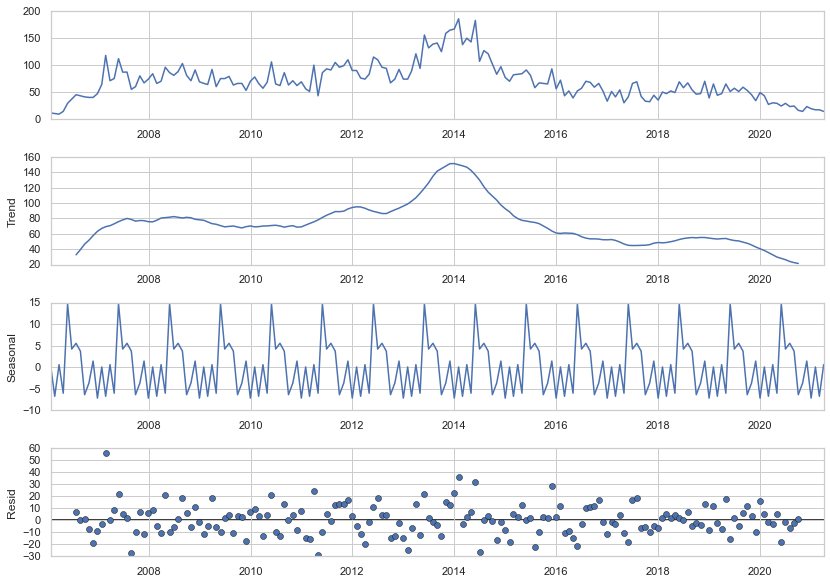

In [127]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = dfm
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
pyplot.show()

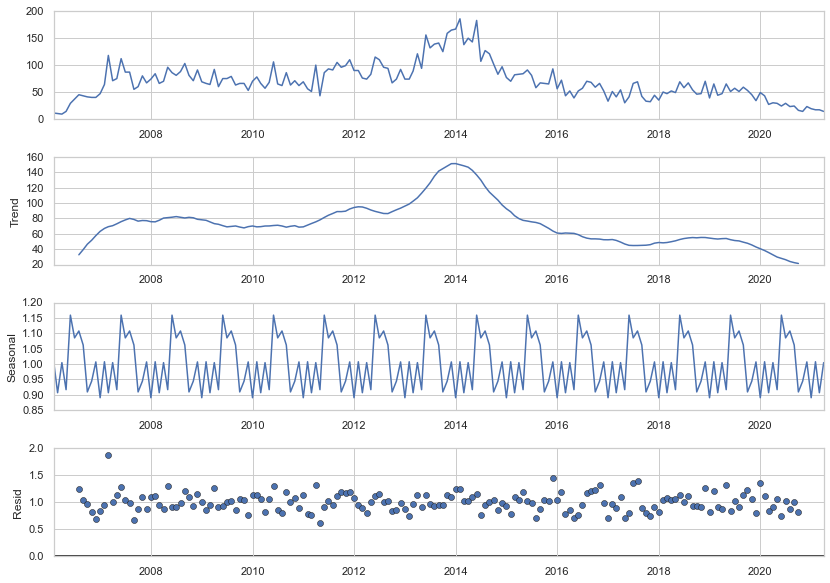

In [128]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = dfm
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
pyplot.show()

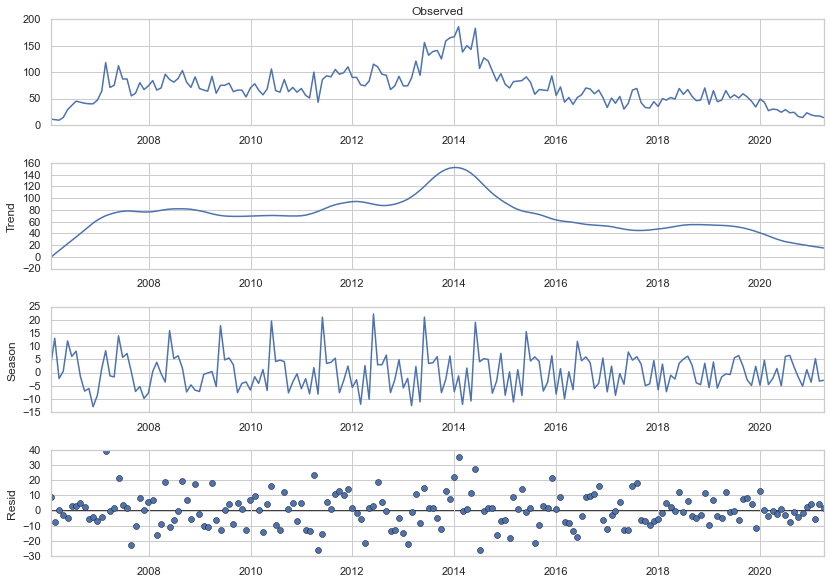

In [131]:
from statsmodels.tsa.seasonal import STL
stl = STL(dfm, seasonal=13)
res = stl.fit()
fig = res.plot()

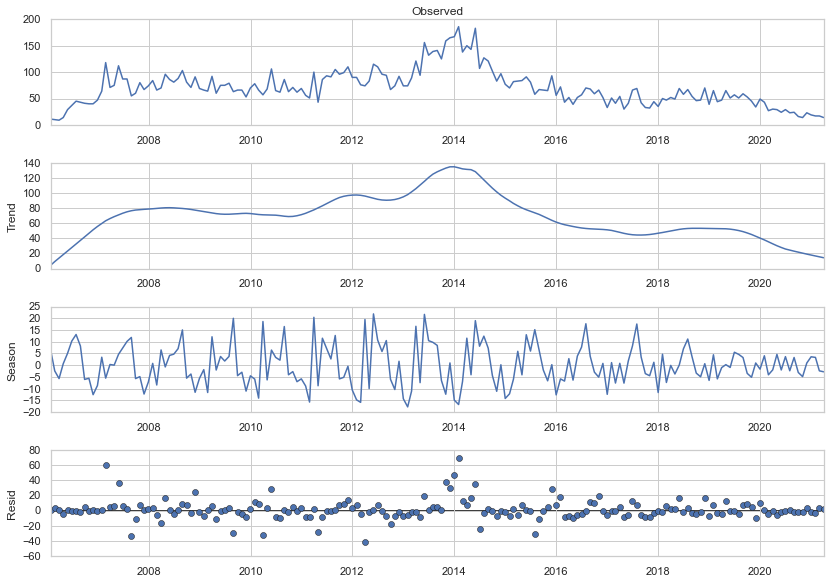

In [132]:
res = STL(dfm, robust = True).fit() 
res.plot()
plt.show()

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = 
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

In [69]:
#dfEqY_YM['Year'] = pd.to_datetime(dfEqY_YM['Year'])
#dfEqY_YM['Month'] = pd.to_datetime(dfEqY_YM['Month'])

#dfEqM_YM['Year'] = pd.to_datetime(dfEqM_YM['Year'])
#dfEqM_YM['Month'] = pd.to_datetime(dfEqM_YM['Month'])

#dfEqW_YM['Year'] = pd.to_datetime(dfEqW_YM['Year'])
#dfEqW_YM['Month'] = pd.to_datetime(dfEqW_YM['Month'])

#dfEqD_YM['Year'] = pd.to_datetime(dfEqD_YM['Year'])
#dfEqD_YM['Month'] = pd.to_datetime(dfEqD_YM['Month'])

In [70]:
dfEqY_YM.dtypes

incidentdate    datetime64[ns]
estimatedqty           float64
spillno                  int64
Year                     int64
Month                    int64
dtype: object

In [71]:
df_grpMbyM = dfEqM_YM.groupby('Month')['estimatedqty','spillno'].sum()
df_grpWbyM = dfEqW_YM.groupby('Month')['estimatedqty','spillno'].sum()
df_grpDbyM = dfEqD_YM.groupby('Month')['estimatedqty','spillno'].sum()

C:\Users\OMEDE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\OMEDE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\OMEDE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
df_grpMbyM

estimatedqty  spillno
Month                        
1       77700.614723     1031
2       46926.975982      951
3       40339.988632     1039
4       44920.179093      968
5       41225.359711     1252
6      113855.786855     1113
7       56192.352161     1136
8       82058.305741     1115
9       27329.646780      962
10      29941.926849     1010
11      54526.615618     1075
12      88002.293809      953

In [73]:
df_grpMbyM.dtypes

estimatedqty    float64
spillno           int64
dtype: object

In [74]:
df_grpDbyM1 = df_grpDbyM.reset_index()

In [75]:
df_grpDbyM1.dtypes

Month             int64
estimatedqty    float64
spillno           int64
dtype: object

In [76]:
dfEqD_YM.estimatedqty.describe()

count     5475.000000
mean       128.405488
std       1147.793747
min          0.000000
25%          0.000000
50%          2.900000
75%         30.000000
max      55007.000000
Name: estimatedqty, dtype: float64

In [77]:
dfEqD_YM.spillno.describe()

count    5475.000000
mean        2.302283
std         2.247425
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        39.000000
Name: spillno, dtype: float64

In [78]:
dfEqD_YM

incidentdate  estimatedqty  spillno  Year  Month
0      2005-01-02  0.000000e+00        1  2005      1
1      2005-01-03  0.000000e+00        0  2005      1
2      2005-01-04  0.000000e+00        2  2005      1
3      2005-01-05  5.680000e-02        2  2005      1
4      2005-01-06  0.000000e+00        1  2005      1
5      2005-01-07  0.000000e+00        0  2005      1
6      2005-01-08  2.000000e-04        1  2005      1
7      2005-01-09  0.000000e+00        0  2005      1
8      2005-01-10  0.000000e+00        0  2005      1
9      2005-01-11  0.000000e+00        0  2005      1
10     2005-01-12  0.000000e+00        0  2005      1
11     2005-01-13  0.000000e+00        1  2005      1
12     2005-01-14  0.000000e+00        1  2005      1
13     2005-01-15  0.000000e+00        1  2005      1
14     2005-01-16  0.000000e+00        0  2005      1
15     2005-01-17  0.000000e+00        0  2005      1
16     2005-01-18  0.000000e+00        0  2005      1
17     2005-01-19  0.000000e+00        0  2005      1
18     2005-01-20  0.000000e+00        1  2005      1
19     2005-01-21  0.000000e+00        1  2005      1
20     2005-01-22  0.000000e+00        2  2005      1
21     2005-01-23  0.000000e+00        0  2005      1
22     2005-01-24  0.000000e+00        0  2005      1
23     2005-01-25  0.000000e+00        0  2005      1
24     2005-01-26  0.000000e+00        0  2005      1
25     2005-01-27  0.000000e+00        0  2005      1
26     2005-01-28  0.000000e+00        0  2005      1
27     2005-01-29  0.000000e+00        0  2005      1
28     2005-01-30  0.000000e+00        0  2005      1
29     2005-01-31  1.000000e+02        2  2005      1
30     2005-02-01  0.000000e+00        0  2005      2
31     2005-02-02  0.000000e+00        0  2005      2
32     2005-02-03  0.000000e+00        0  2005      2
33     2005-02-04  0.000000e+00        0  2005      2
34     2005-02-05  0.000000e+00        0  2005      2
35     2005-02-06  0.000000e+00        0  2005      2
36     2005-02-07  0.000000e+00        0  2005      2
37     2005-02-08  3.000000e-02        1  2005      2
38     2005-02-09  0.000000e+00        0  2005      2
39     2005-02-10  0.000000e+00        1  2005      2
40     2005-02-11  0.000000e+00        2  2005      2
41     2005-02-12  0.000000e+00        0  2005      2
42     2005-02-13  0.000000e+00        0  2005      2
43     2005-02-14  0.000000e+00        0  2005      2
44     2005-02-15  0.000000e+00        0  2005      2
45     2005-02-16  0.000000e+00        1  2005      2
46     2005-02-17  0.000000e+00        0  2005      2
47     2005-02-18  0.000000e+00        0  2005      2
48     2005-02-19  0.000000e+00        0  2005      2
49     2005-02-20  0.000000e+00        1  2005      2
50     2005-02-21  0.000000e+00        5  2005      2
51     2005-02-22  0.000000e+00        4  2005      2
52     2005-02-23  0.000000e+00        2  2005      2
53     2005-02-24  0.000000e+00        1  2005      2
54     2005-02-25  0.000000e+00        0  2005      2
55     2005-02-26  0.000000e+00        0  2005      2
56     2005-02-27  0.000000e+00        0  2005      2
57     2005-02-28  0.000000e+00        1  2005      2
58     2005-03-01  0.000000e+00        0  2005      3
59     2005-03-02  0.000000e+00        0  2005      3
60     2005-03-03  0.000000e+00        0  2005      3
61     2005-03-04  0.000000e+00        0  2005      3
62     2005-03-05  0.000000e+00        1  2005      3
63     2005-03-06  0.000000e+00        0  2005      3
64     2005-03-07  0.000000e+00        0  2005      3
65     2005-03-08  3.000000e+00        4  2005      3
66     2005-03-09  0.000000e+00        0  2005      3
67     2005-03-10  0.000000e+00        0  2005      3
68     2005-03-11  6.000000e-02        1  2005      3
69     2005-03-12  0.000000e+00        0  2005      3
70     2005-03-13  0.000000e+00        0  2005      3
71     2005-03-14  0.000000e+00        1  2005      3
72     2005-03-15  0.000000e+00        0  2005      3
73     20

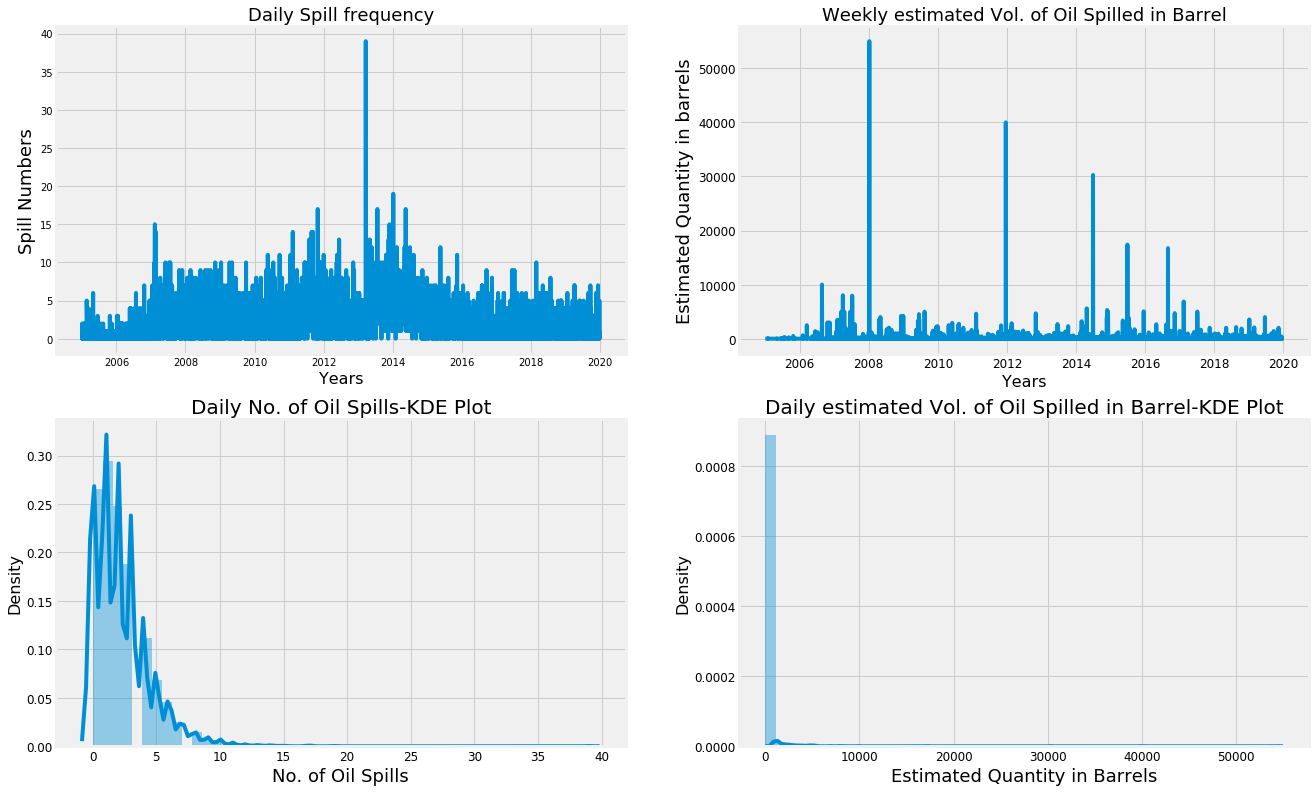

In [79]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqD_YM['incidentdate'], dfEqD_YM['spillno'] )
plt.title('Daily Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqD_YM['incidentdate'], dfEqD_YM['estimatedqty'] )
plt.title('Weekly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqD_YM['spillno'])
plt.title('Daily No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqD_YM['estimatedqty'])
plt.title('Daily estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

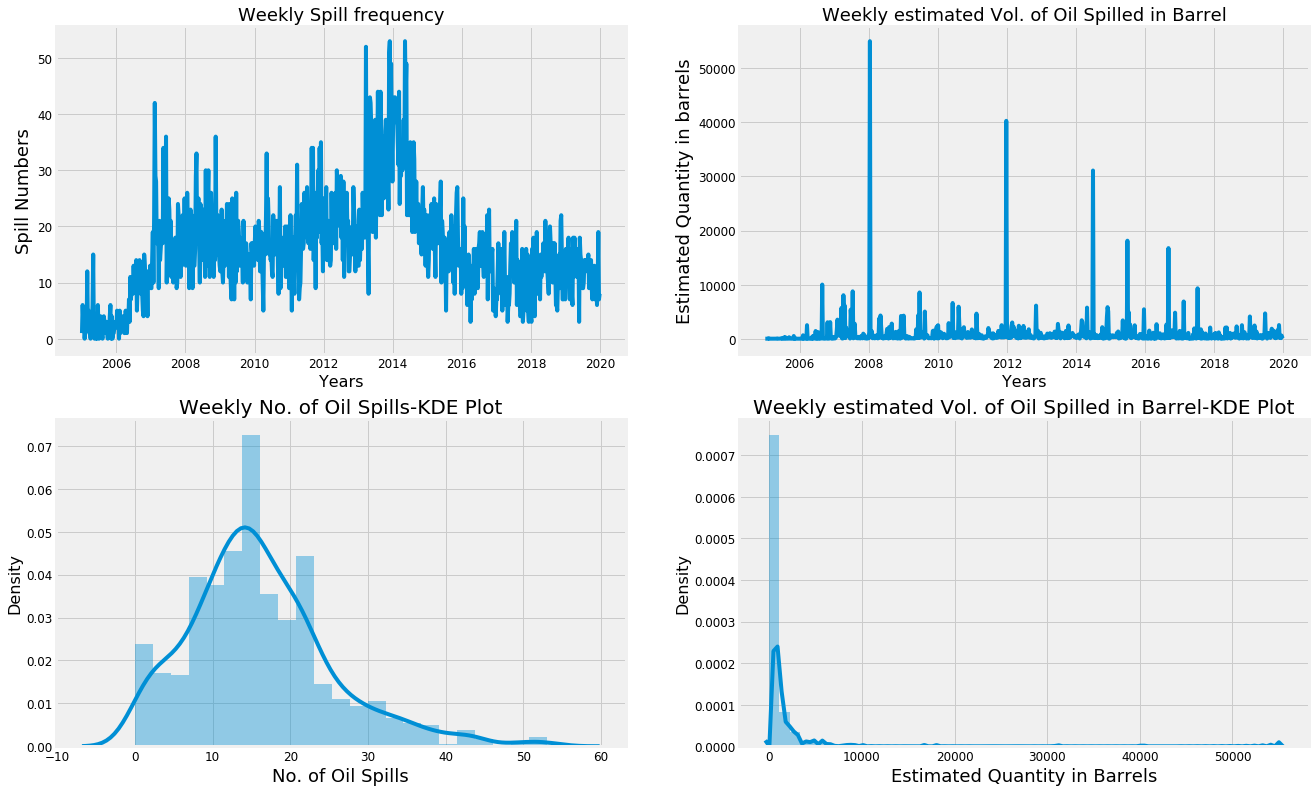

In [80]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqW_YM['incidentdate'], dfEqW_YM['spillno'] )
plt.title('Weekly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqW_YM['incidentdate'], dfEqW_YM['estimatedqty'] )
plt.title('Weekly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqW_YM['spillno'])
plt.title('Weekly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqW_YM['estimatedqty'])
plt.title('Weekly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

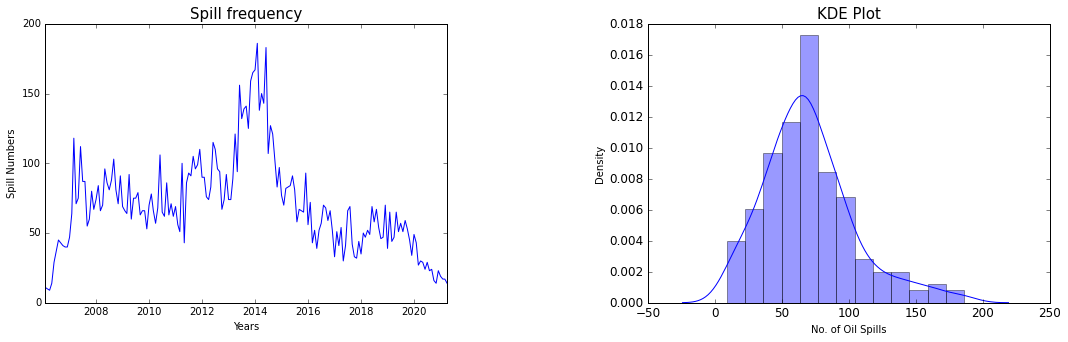

In [88]:
plt.figure(figsize = (18,5))
#plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

plt.subplot(1,2,1)
plt.plot(dfM1['incidentdate'], dfM1['spillno'] )
plt.title('Spill frequency', fontsize = 15)
plt.xlabel('Years', fontsize = 10)
plt.ylabel('Spill Numbers', fontsize = 10)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12


plt.subplot(1,2,2)
sns.distplot(dfM1['spillno'])
plt.title('KDE Plot', fontsize = 15)
plt.xlabel('No. of Oil Spills', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10



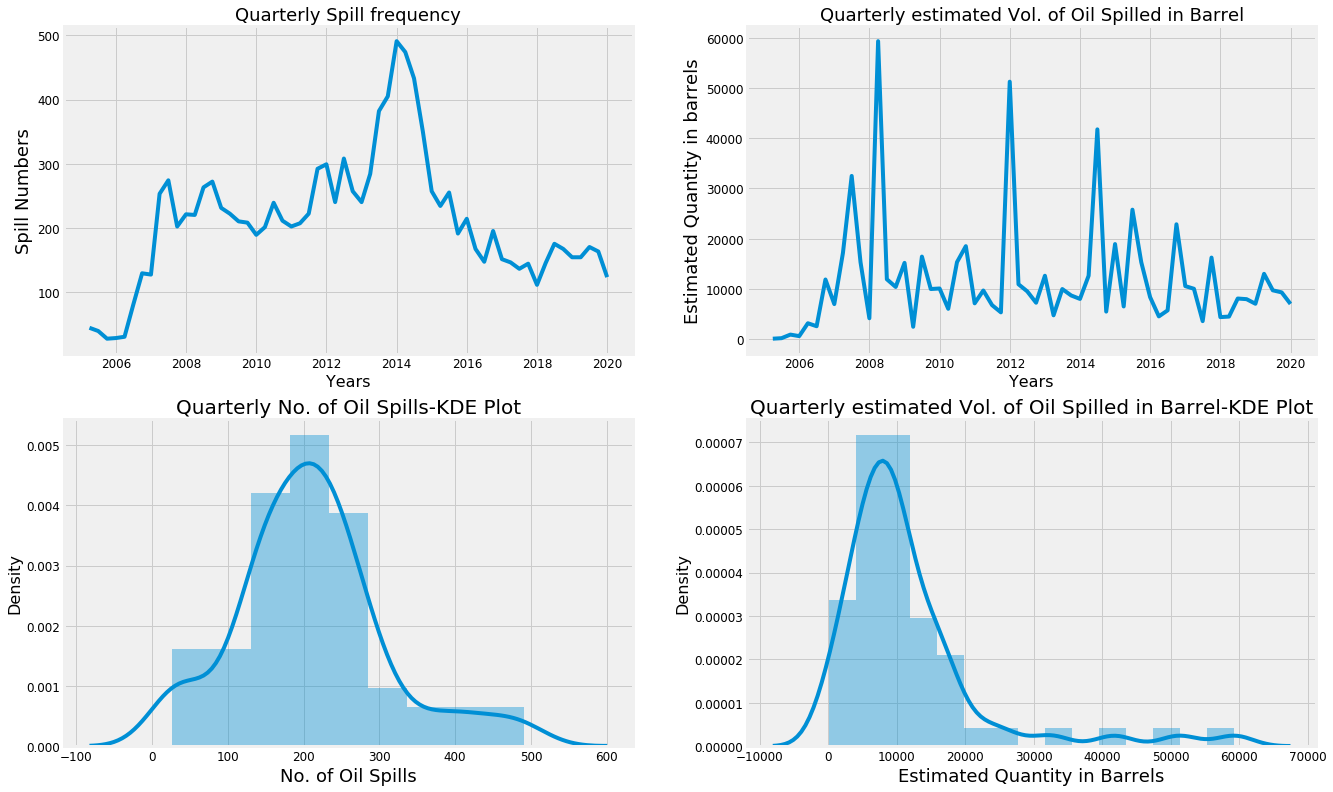

In [82]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqQ_YM['incidentdate'], dfEqQ_YM['spillno'] )
plt.title('Quarterly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqQ_YM['incidentdate'], dfEqQ_YM['estimatedqty'] )
plt.title('Quarterly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqQ_YM['spillno'])
plt.title('Quarterly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqQ_YM['estimatedqty'])
plt.title('Quarterly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

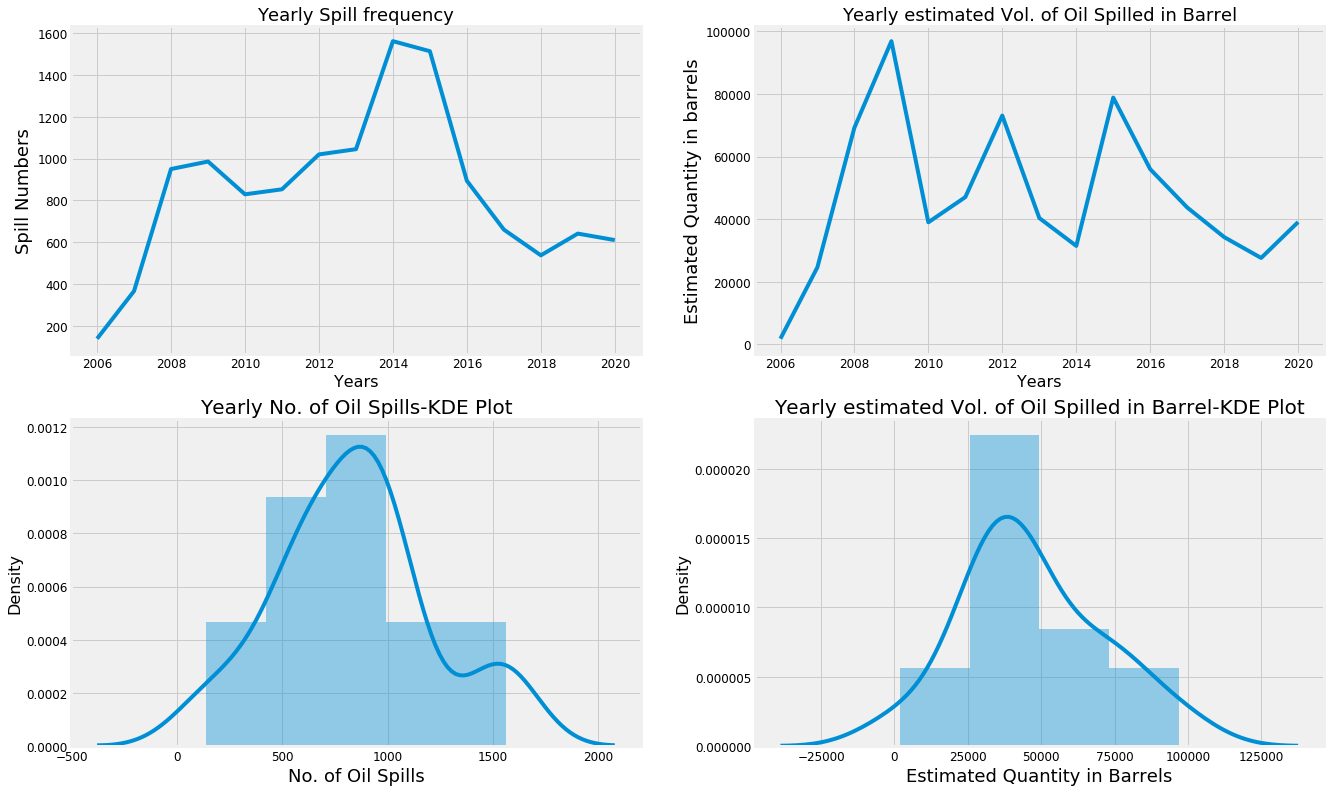

In [83]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqY_YM['incidentdate'], dfEqY_YM['spillno'] )
plt.title('Yearly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqY_YM['incidentdate'], dfEqY_YM['estimatedqty'] )
plt.title('Yearly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqY_YM['spillno'])
plt.title('Yearly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqY_YM['estimatedqty'])
plt.title('Yearly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [90]:
dfM1

incidentdate  spillno  Year  Month
0     2006-01-31       11  2006      1
1     2006-02-28       10  2006      2
2     2006-03-31        9  2006      3
3     2006-04-30       14  2006      4
4     2006-05-31       29  2006      5
5     2006-06-30       37  2006      6
6     2006-07-31       45  2006      7
7     2006-08-31       43  2006      8
8     2006-09-30       41  2006      9
9     2006-10-31       40  2006     10
10    2006-11-30       40  2006     11
11    2006-12-31       47  2006     12
12    2007-01-31       64  2007      1
13    2007-02-28      118  2007      2
14    2007-03-31       71  2007      3
15    2007-04-30       75  2007      4
16    2007-05-31      112  2007      5
17    2007-06-30       87  2007      6
18    2007-07-31       87  2007      7
19    2007-08-31       55  2007      8
20    2007-09-30       60  2007      9
21    2007-10-31       80  2007     10
22    2007-11-30       67  2007     11
23    2007-12-31       74  2007     12
24    2008-01-31       84  2008      1
25    2008-02-29       66  2008      2
26    2008-03-31       70  2008      3
27    2008-04-30       96  2008      4
28    2008-05-31       86  2008      5
29    2008-06-30       81  2008      6
30    2008-07-31       88  2008      7
31    2008-08-31      103  2008      8
32    2008-09-30       81  2008      9
33    2008-10-31       71  2008     10
34    2008-11-30       91  2008     11
35    2008-12-31       69  2008     12
36    2009-01-31       66  2009      1
37    2009-02-28       64  2009      2
38    2009-03-31       92  2009      3
39    2009-04-30       60  2009      4
40    2009-05-31       75  2009      5
41    2009-06-30       75  2009      6
42    2009-07-31       79  2009      7
43    2009-08-31       63  2009      8
44    2009-09-30       66  2009      9
45    2009-10-31       66  2009     10
46    2009-11-30       53  2009     11
47    2009-12-31       70  2009     12
48    2010-01-31       78  2010      1
49    2010-02-28       66  2010      2
50    2010-03-31       57  2010      3
51    2010-04-30       68  2010      4
52    2010-05-31      106  2010      5
53    2010-06-30       65  2010      6
54    2010-07-31       62  2010      7
55    2010-08-31       86  2010      8
56    2010-09-30       63  2010      9
57    2010-10-31       71  2010     10
58    2010-11-30       62  2010     11
59    2010-12-31       69  2010     12
60    2011-01-31       56  2011      1
61    2011-02-28       51  2011      2
62    2011-03-31      100  2011      3
63    2011-04-30       43  2011      4
64    2011-05-31       86  2011      5
65    2011-06-30       93  2011      6
66    2011-07-31       91  2011      7
67    2011-08-31      105  2011      8
68    2011-09-30       96  2011      9
69    2011-10-31       99  2011     10
70    2011-11-30      110  2011     11
71    2011-12-31       90  2011     12
72    2012-01-31       90  2012      1
73    2012-02-29       76  2012      2
74    2012-03-31       74  2012      3
75    2012-04-30       83  2012      4
76    2012-05-31      115  2012      5
77    2012-06-30      110  2012      6
78    2012-07-31       96  2012      7
79    2012-08-31       94  2012      8
80    2012-09-30       67  2012      9
81    2012-10-31       74  2012     10
82    2012-11-30       92  2012     11
83    2012-12-31       74  2012     12
84    2013-01-31       74  2013      1
85    2013-02-28       89  2013      2
86    2013-03-31      121  2013      3
87    2013-04-30       94  2013      4
88    2013-05-31      156  2013      5
89    2013-06-30      132  2013      6
90    2013-07-31      139  2013      7
91    2013-08-31      141  2013      8
92    2013-09-30      125  2013      9
93    2013-10-31      159  2013     10
94    2013-11-30      165  2013     11
95    2013-12-31      167  2013     12
96    2014-01-31      186  2014      1
97    2014-02-28      138  2014      2
98    2014-03-31      150  2014      3
99    2014-04-30      143  2014      4
100   2014-05-31      183  2014      5
101   2014-06-30      107 

In [100]:
dfM1['month'] = dfM1['incidentdate'].dt.strftime('%b')

In [101]:
dfM1

incidentdate  spillno  Year      Month month
0     2006-01-31       11  2006    January   Jan
1     2006-02-28       10  2006   February   Feb
2     2006-03-31        9  2006      March   Mar
3     2006-04-30       14  2006      April   Apr
4     2006-05-31       29  2006        May   May
5     2006-06-30       37  2006       June   Jun
6     2006-07-31       45  2006       July   Jul
7     2006-08-31       43  2006     August   Aug
8     2006-09-30       41  2006  September   Sep
9     2006-10-31       40  2006    October   Oct
10    2006-11-30       40  2006   November   Nov
11    2006-12-31       47  2006   December   Dec
12    2007-01-31       64  2007    January   Jan
13    2007-02-28      118  2007   February   Feb
14    2007-03-31       71  2007      March   Mar
15    2007-04-30       75  2007      April   Apr
16    2007-05-31      112  2007        May   May
17    2007-06-30       87  2007       June   Jun
18    2007-07-31       87  2007       July   Jul
19    2007-08-31       55  2007     August   Aug
20    2007-09-30       60  2007  September   Sep
21    2007-10-31       80  2007    October   Oct
22    2007-11-30       67  2007   November   Nov
23    2007-12-31       74  2007   December   Dec
24    2008-01-31       84  2008    January   Jan
25    2008-02-29       66  2008   February   Feb
26    2008-03-31       70  2008      March   Mar
27    2008-04-30       96  2008      April   Apr
28    2008-05-31       86  2008        May   May
29    2008-06-30       81  2008       June   Jun
30    2008-07-31       88  2008       July   Jul
31    2008-08-31      103  2008     August   Aug
32    2008-09-30       81  2008  September   Sep
33    2008-10-31       71  2008    October   Oct
34    2008-11-30       91  2008   November   Nov
35    2008-12-31       69  2008   December   Dec
36    2009-01-31       66  2009    January   Jan
37    2009-02-28       64  2009   February   Feb
38    2009-03-31       92  2009      March   Mar
39    2009-04-30       60  2009      April   Apr
40    2009-05-31       75  2009        May   May
41    2009-06-30       75  2009       June   Jun
42    2009-07-31       79  2009       July   Jul
43    2009-08-31       63  2009     August   Aug
44    2009-09-30       66  2009  September   Sep
45    2009-10-31       66  2009    October   Oct
46    2009-11-30       53  2009   November   Nov
47    2009-12-31       70  2009   December   Dec
48    2010-01-31       78  2010    January   Jan
49    2010-02-28       66  2010   February   Feb
50    2010-03-31       57  2010      March   Mar
51    2010-04-30       68  2010      April   Apr
52    2010-05-31      106  2010        May   May
53    2010-06-30       65  2010       June   Jun
54    2010-07-31       62  2010       July   Jul
55    2010-08-31       86  2010     August   Aug
56    2010-09-30       63  2010  September   Sep
57    2010-10-31       71  2010    October   Oct
58    2010-11-30       62  2010   November   Nov
59    2010-12-31       69  2010   December   Dec
60    2011-01-31       56  2011    January   Jan
61    2011-02-28       51  2011   February   Feb
62    2011-03-31      100  2011      March   Mar
63    2011-04-30       43  2011      April   Apr
64    2011-05-31       86  2011        May   May
65    2011-06-30       93  2011       June   Jun
66    2011-07-31       91  2011       July   Jul
67    2011-08-31      105  2011     August   Aug
68    2011-09-30       96  2011  September   Sep
69    2011-10-31       99  2011    October   Oct
70    2011-11-30      110  2011   November   Nov
71    2011-12-31       90  2011   December   Dec
72    2012-01-31       90  2012    January   Jan
73    2012-02-29       76  2012   February   Feb
74    2012-03-31       74  2012      March   Mar
75    2012-04-30       83  2012      April   Apr
76    2012-05-31      115  2012        May   May
77    2012-06-30      110  2012       June   Jun
78    2012-07-31       96  2012       July   Jul
79    2012-08-31       94  2012     August   Aug
80    2012-09-30       67  2012  Se

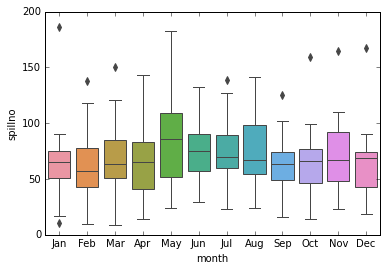

In [102]:
sns.boxplot(x = 'month', y ='spillno', data = dfM1)

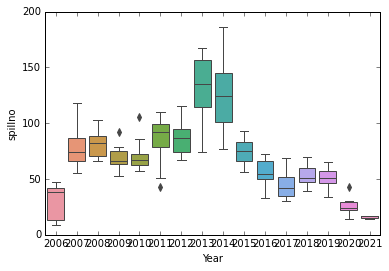

In [103]:
sns.boxplot(x = 'Year', y ='spillno', data = dfM1)

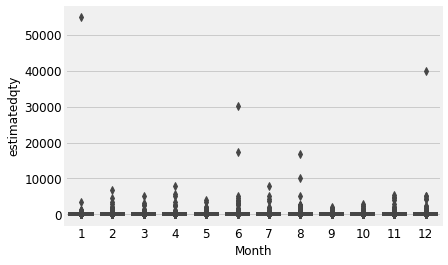

In [86]:
sns.boxplot(x = 'Month', y ='estimatedqty', data = dfEqD_YM)

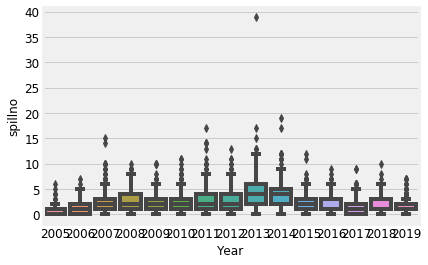

In [87]:
sns.boxplot(x = 'Year', y ='spillno', data = dfEqD_YM)


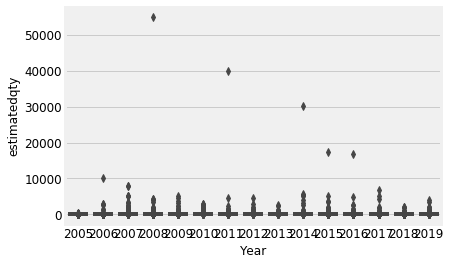

In [88]:
sns.boxplot(x = 'Year', y ='estimatedqty', data = dfEqD_YM)


In [89]:
dfEq_lt1g = dfEq_lt1.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfEq_lt1g = dfEq_lt1g.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfEq_lt1g = dfEq_lt1g.reset_index()

In [90]:
dfEq_lt1g['Year'] = dfEq_lt1g['incidentdate'].dt.year
dfEq_lt1g['Month'] = dfEq_lt1g['incidentdate'].dt.month

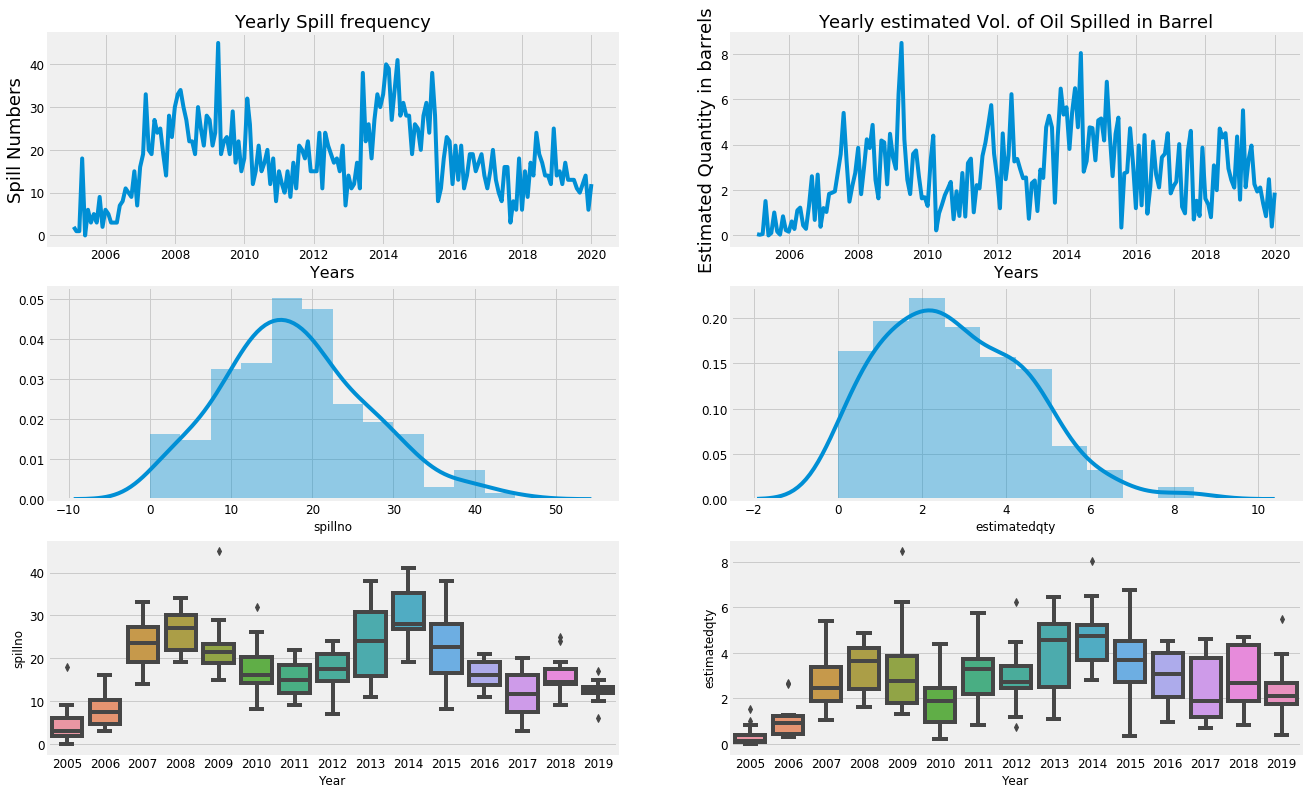

In [91]:
# PLOT OF SPILLS LESS THAN 1 BARREL GROUPED MONTHLY

plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)



plt.subplot(3,2,1)
plt.plot(dfEq_lt1g['incidentdate'], dfEq_lt1g['spillno'] )
plt.title('Yearly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,2,2)
plt.plot(dfEq_lt1g['incidentdate'], dfEq_lt1g['estimatedqty'] )
plt.title('Yearly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,2,3)
sns.distplot(dfEq_lt1g['spillno'])

plt.subplot(3,2,4)
sns.distplot(dfEq_lt1g['estimatedqty'])

plt.subplot(3,2,5)
sns.boxplot(x = 'Year', y ='spillno', data = dfEq_lt1g)

plt.subplot(3,2,6)
sns.boxplot(x = 'Year', y ='estimatedqty', data = dfEq_lt1g)

In [92]:
dfEqD_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqD_YM.csv', index = False)
dfEqW_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqW_YM.csv', index = False)
dfEqM_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqM_YM.csv', index = False)
dfEqQ_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqQ_YM.csv', index = False)
dfEqY_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqY_YM.csv', index = False)
df0.to_csv(r'C:\Users\OMEDE\Documents\df0.csv', index = False)
df1.to_csv(r'C:\Users\OMEDE\Documents\df1.csv', index = False)
df2.to_csv(r'C:\Users\OMEDE\Documents\df2.csv', index = False)
dfEq.to_csv(r'C:\Users\OMEDE\Documents\dfEq.csv', index = False)
dfEqM.to_csv(r'C:\Users\OMEDE\Documents\dfEqM.csv', index = False)
dfEqY.to_csv(r'C:\Users\OMEDE\Documents\dfEqY.csv', index = False)
dfEqW.to_csv(r'C:\Users\OMEDE\Documents\dfEqW.csv', index = False)
dfEqD.to_csv(r'C:\Users\OMEDE\Documents\dfEqD.csv', index = False)
dfEqQ.to_csv(r'C:\Users\OMEDE\Documents\dfEqQ.csv', index = False)

In [128]:
dfEq1.to_csv(r'C:\Users\OMEDE\Documents\dfEq1.csv', index = False)

In [129]:
dfEq1

incidentdate  estimatedquantity
0       2006-11-23              225.0
1       2006-12-18                0.5
2       2006-12-27               25.0
3       2007-05-14                2.0
5       2007-08-30              200.0
...            ...                ...
14882   2015-04-21                NaN
14883   2014-05-17                NaN
14884   2014-05-05                NaN
14885   2015-04-23                NaN
14890   2018-05-12                3.1

[12605 rows x 2 columns]

In [93]:
dfEqY_YM

incidentdate  estimatedqty  spillno  Year  Month
0    2005-12-31   1842.723600      138  2005     12
1    2006-12-31  24636.287000      366  2006     12
2    2007-12-31  69167.936700      950  2007     12
3    2008-12-31  96847.249120      986  2008     12
4    2009-12-31  39010.140300      829  2009     12
5    2010-12-31  47049.500500      853  2010     12
6    2011-12-31  73082.435500     1020  2011     12
7    2012-12-31  40368.097300     1045  2012     12
8    2013-12-31  31469.481227     1562  2013     12
9    2014-12-31  78840.321201     1514  2014     12
10   2015-12-31  55986.864105      894  2015     12
11   2016-12-31  43724.654664      660  2016     12
12   2017-12-31  34277.876228      537  2017     12
13   2018-12-31  27630.316292      641  2018     12
14   2019-12-31  39086.162218      610  2019     12

In [94]:
AdfEqY_YM = dfEqY_YM.copy()

In [95]:
AdfEqY_YM = AdfEqY_YM.set_index('incidentdate')

In [96]:
AdfEqY_YM

estimatedqty  spillno  Year  Month
incidentdate                                    
2005-12-31     1842.723600      138  2005     12
2006-12-31    24636.287000      366  2006     12
2007-12-31    69167.936700      950  2007     12
2008-12-31    96847.249120      986  2008     12
2009-12-31    39010.140300      829  2009     12
2010-12-31    47049.500500      853  2010     12
2011-12-31    73082.435500     1020  2011     12
2012-12-31    40368.097300     1045  2012     12
2013-12-31    31469.481227     1562  2013     12
2014-12-31    78840.321201     1514  2014     12
2015-12-31    55986.864105      894  2015     12
2016-12-31    43724.654664      660  2016     12
2017-12-31    34277.876228      537  2017     12
2018-12-31    27630.316292      641  2018     12
2019-12-31    39086.162218      610  2019     12

In [100]:
dfEqD_YM.isna().sum()

incidentdate    0
estimatedqty    0
spillno         0
Year            0
Month           0
dtype: int64

In [103]:
dfEq.dtypes

incidentdate         datetime64[ns]
estimatedquantity           float64
dtype: object

In [104]:
dfEq

incidentdate  estimatedquantity
0       2006-11-23             225.00
1       2006-12-18               0.50
2       2006-12-27              25.00
3       2007-05-14               2.00
5       2007-08-30             200.00
...            ...                ...
14893   2020-06-08              52.54
14894   2020-06-08              65.44
14895   2020-07-07               7.00
14899   2020-03-27              43.00
14900   2020-04-23              54.00

[13249 rows x 2 columns]

In [105]:
AdEq = dfEq.copy()

In [107]:
AdEq = AdEq.set_index('incidentdate')

In [108]:
AdEq

estimatedquantity
incidentdate                   
2006-11-23               225.00
2006-12-18                 0.50
2006-12-27                25.00
2007-05-14                 2.00
2007-08-30               200.00
...                         ...
2020-06-08                52.54
2020-06-08                65.44
2020-07-07                 7.00
2020-03-27                43.00
2020-04-23                54.00

[13249 rows x 1 columns]

In [109]:
AdEq['2005'].isna().sum()

estimatedquantity    53
dtype: int64

In [111]:
AdEq['2006'].isna().sum()

estimatedquantity    153
dtype: int64

In [112]:
AdEq['2007'].isna().sum()

estimatedquantity    217
dtype: int64

In [113]:
AdEq['2008'].isna().sum()

estimatedquantity    273
dtype: int64

In [114]:
AdEq['2009'].isna().sum()

estimatedquantity    217
dtype: int64

In [115]:
AdEq['2010'].isna().sum()

estimatedquantity    230
dtype: int64

In [116]:
AdEq['2011'].isna().sum()

estimatedquantity    323
dtype: int64

In [117]:
AdEq['2012'].isna().sum()

estimatedquantity    316
dtype: int64

In [118]:
AdEq['2013'].isna().sum()

estimatedquantity    659
dtype: int64

In [119]:
AdEq['2014'].isna().sum()

estimatedquantity    539
dtype: int64

In [120]:
AdEq['2015'].isna().sum()

estimatedquantity    246
dtype: int64

In [121]:
AdEq['2016'].isna().sum()

estimatedquantity    152
dtype: int64

In [122]:
AdEq['2017'].isna().sum()

estimatedquantity    133
dtype: int64

In [123]:
AdEq['2018'].isna().sum()

estimatedquantity    108
dtype: int64

In [124]:
AdEq['2019'].isna().sum()

estimatedquantity    82
dtype: int64

In [125]:
AdEq['2020'].isna().sum()

estimatedquantity    12
dtype: int64

In [133]:
dfEqD1 = dfEqD.reset_index()


In [134]:
dfEqD1

incidentdate           sum  size
0      2005-01-02  0.000000e+00     1
1      2005-01-03  0.000000e+00     0
2      2005-01-04  0.000000e+00     2
3      2005-01-05  5.680000e-02     2
4      2005-01-06  0.000000e+00     1
5      2005-01-07  0.000000e+00     0
6      2005-01-08  2.000000e-04     1
7      2005-01-09  0.000000e+00     0
8      2005-01-10  0.000000e+00     0
9      2005-01-11  0.000000e+00     0
10     2005-01-12  0.000000e+00     0
11     2005-01-13  0.000000e+00     1
12     2005-01-14  0.000000e+00     1
13     2005-01-15  0.000000e+00     1
14     2005-01-16  0.000000e+00     0
15     2005-01-17  0.000000e+00     0
16     2005-01-18  0.000000e+00     0
17     2005-01-19  0.000000e+00     0
18     2005-01-20  0.000000e+00     1
19     2005-01-21  0.000000e+00     1
20     2005-01-22  0.000000e+00     2
21     2005-01-23  0.000000e+00     0
22     2005-01-24  0.000000e+00     0
23     2005-01-25  0.000000e+00     0
24     2005-01-26  0.000000e+00     0
25     2005-01-27  0.000000e+00     0
26     2005-01-28  0.000000e+00     0
27     2005-01-29  0.000000e+00     0
28     2005-01-30  0.000000e+00     0
29     2005-01-31  1.000000e+02     2
30     2005-02-01  0.000000e+00     0
31     2005-02-02  0.000000e+00     0
32     2005-02-03  0.000000e+00     0
33     2005-02-04  0.000000e+00     0
34     2005-02-05  0.000000e+00     0
35     2005-02-06  0.000000e+00     0
36     2005-02-07  0.000000e+00     0
37     2005-02-08  3.000000e-02     1
38     2005-02-09  0.000000e+00     0
39     2005-02-10  0.000000e+00     1
40     2005-02-11  0.000000e+00     2
41     2005-02-12  0.000000e+00     0
42     2005-02-13  0.000000e+00     0
43     2005-02-14  0.000000e+00     0
44     2005-02-15  0.000000e+00     0
45     2005-02-16  0.000000e+00     1
46     2005-02-17  0.000000e+00     0
47     2005-02-18  0.000000e+00     0
48     2005-02-19  0.000000e+00     0
49     2005-02-20  0.000000e+00     1
50     2005-02-21  0.000000e+00     5
51     2005-02-22  0.000000e+00     4
52     2005-02-23  0.000000e+00     2
53     2005-02-24  0.000000e+00     1
54     2005-02-25  0.000000e+00     0
55     2005-02-26  0.000000e+00     0
56     2005-02-27  0.000000e+00     0
57     2005-02-28  0.000000e+00     1
58     2005-03-01  0.000000e+00     0
59     2005-03-02  0.000000e+00     0
60     2005-03-03  0.000000e+00     0
61     2005-03-04  0.000000e+00     0
62     2005-03-05  0.000000e+00     1
63     2005-03-06  0.000000e+00     0
64     2005-03-07  0.000000e+00     0
65     2005-03-08  3.000000e+00     4
66     2005-03-09  0.000000e+00     0
67     2005-03-10  0.000000e+00     0
68     2005-03-11  6.000000e-02     1
69     2005-03-12  0.000000e+00     0
70     2005-03-13  0.000000e+00     0
71     2005-03-14  0.000000e+00     1
72     2005-03-15  0.000000e+00     0
73     2005-03-16  0.000000e+00     0
74     2005-03-17  0.000000e+00     0
75     2005-03-18  0.000000e+00     0
76     2005-03-19  0.000000e+00     0
77     2005-03-20  0.000000e+00     0
78     2005-03-21  0.000000e+00     0
79     2005-03-22  0.000000e+00     0
80     2005-03-23  0.000000e+00     0
81     2005-03-24  0.000000e+00     1
82     2005-03-25  0.000000e+00     0
83     2005-03-26  0.000000e+00     0
84     2005-03-27  0.000000e+00     1
85     2005-03-28  0.000000e+00     0
86     2005-03-29  0.000000e+00     0
87     2005-03-30  0.000000e+00     0
88     2005-03-31  0.000000e+00     0
89     2005-04-01  0.000000e+00     0
90     2005-04-02  0.000000e+00     0
91     2005-04-03  0.000000e+00     0
92     2005-04-04  0.000000e+00     0
93     2005-04-05  1.000000e-04     1
94     2005-04-06  0.000000e+00     0
95     2005-04-07  0.000000e+00     0
96     2005-04-08  3.000000e-02     1
97     2005-04-09  2.100000e+00     2
98     2005-04-10  0.000000e+00     0
99     2005-04-11  0.000000e+00     0
100    2005-04-12  0.000000e+00     0
101    2005-04-13  0.000000e+00     0
102    2005-04-14  3.500000e-02     1
103    2005-04-15  0.000000e+00     0
104    2005-04-

In [137]:
dfEqD_YM

incidentdate  estimatedqty  spillno
0      2005-01-02  0.000000e+00        1
1      2005-01-03  0.000000e+00        0
2      2005-01-04  0.000000e+00        2
3      2005-01-05  5.680000e-02        2
4      2005-01-06  0.000000e+00        1
5      2005-01-07  0.000000e+00        0
6      2005-01-08  2.000000e-04        1
7      2005-01-09  0.000000e+00        0
8      2005-01-10  0.000000e+00        0
9      2005-01-11  0.000000e+00        0
10     2005-01-12  0.000000e+00        0
11     2005-01-13  0.000000e+00        1
12     2005-01-14  0.000000e+00        1
13     2005-01-15  0.000000e+00        1
14     2005-01-16  0.000000e+00        0
15     2005-01-17  0.000000e+00        0
16     2005-01-18  0.000000e+00        0
17     2005-01-19  0.000000e+00        0
18     2005-01-20  0.000000e+00        1
19     2005-01-21  0.000000e+00        1
20     2005-01-22  0.000000e+00        2
21     2005-01-23  0.000000e+00        0
22     2005-01-24  0.000000e+00        0
23     2005-01-25  0.000000e+00        0
24     2005-01-26  0.000000e+00        0
25     2005-01-27  0.000000e+00        0
26     2005-01-28  0.000000e+00        0
27     2005-01-29  0.000000e+00        0
28     2005-01-30  0.000000e+00        0
29     2005-01-31  1.000000e+02        2
30     2005-02-01  0.000000e+00        0
31     2005-02-02  0.000000e+00        0
32     2005-02-03  0.000000e+00        0
33     2005-02-04  0.000000e+00        0
34     2005-02-05  0.000000e+00        0
35     2005-02-06  0.000000e+00        0
36     2005-02-07  0.000000e+00        0
37     2005-02-08  3.000000e-02        1
38     2005-02-09  0.000000e+00        0
39     2005-02-10  0.000000e+00        1
40     2005-02-11  0.000000e+00        2
41     2005-02-12  0.000000e+00        0
42     2005-02-13  0.000000e+00        0
43     2005-02-14  0.000000e+00        0
44     2005-02-15  0.000000e+00        0
45     2005-02-16  0.000000e+00        1
46     2005-02-17  0.000000e+00        0
47     2005-02-18  0.000000e+00        0
48     2005-02-19  0.000000e+00        0
49     2005-02-20  0.000000e+00        1
50     2005-02-21  0.000000e+00        5
51     2005-02-22  0.000000e+00        4
52     2005-02-23  0.000000e+00        2
53     2005-02-24  0.000000e+00        1
54     2005-02-25  0.000000e+00        0
55     2005-02-26  0.000000e+00        0
56     2005-02-27  0.000000e+00        0
57     2005-02-28  0.000000e+00        1
58     2005-03-01  0.000000e+00        0
59     2005-03-02  0.000000e+00        0
60     2005-03-03  0.000000e+00        0
61     2005-03-04  0.000000e+00        0
62     2005-03-05  0.000000e+00        1
63     2005-03-06  0.000000e+00        0
64     2005-03-07  0.000000e+00        0
65     2005-03-08  3.000000e+00        4
66     2005-03-09  0.000000e+00        0
67     2005-03-10  0.000000e+00        0
68     2005-03-11  6.000000e-02        1
69     2005-03-12  0.000000e+00        0
70     2005-03-13  0.000000e+00        0
71     2005-03-14  0.000000e+00        1
72     2005-03-15  0.000000e+00        0
73     2005-03-16  0.000000e+00        0
74     2005-03-17  0.000000e+00        0
75     2005-03-18  0.000000e+00        0
76     2005-03-19  0.000000e+00        0
77     2005-03-20  0.000000e+00        0
78     2005-03-21  0.000000e+00        0
79     2005-03-22  0.000000e+00        0
80     2005-03-23  0.000000e+00        0
81     2005-03-24  0.000000e+00        1
82     2005-03-25  0.000000e+00        0
83     2005-03-26  0.000000e+00        0
84     2005-03-27  0.000000e+00        1
85     2005-03-28  0.000000e+00        0
86     2005-03-29  0.000000e+00        0
87     2005-03-30  0.000000e+00        0
88     2005-03-31  0.000000e+00        0
89     2005-04-01  0.000000e+00        0
90     2005-04-02  0.000000e+00        0
91     2005-04-03  0.000000e+00        0
92     2005-04-04  0.000000e+00        0
93     2005-04-05  1.000000e-04        1
94     2005-04-06  0.000000e+00        0
95     2005-04-07  0.000000e+00        0
96     2005-04-08  3.000000e

In [143]:
AdEq['2018-06'].mean()



estimatedquantity    51.031007
dtype: float64

In [144]:
AdEq['2017-06'].mean()

estimatedquantity    37.830677
dtype: float64

In [145]:
AdEq['2016-06'].mean()

estimatedquantity    30.299913
dtype: float64

In [147]:
AdEq['2019-06'].mean()


estimatedquantity    142.174739
dtype: float64

In [148]:
AdEq['2020-06'].mean()

estimatedquantity    32.396
dtype: float64

In [152]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
%matplotlib inline    
from matplotlib import dates
import warnings
warnings.simplefilter("ignore")
#import easygui as es
#Data Evaluation:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
import matplotlib.ticker as ticker
#Model Selection:
    
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AR,ARResults
from pmdarima import auto_arima
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
#Model Evaluation & Forecasting:
from statsmodels.tools.eval_measures import mse, rmse, meanabs
from sklearn.metrics import mean_squared_error

In [145]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=4).mean()
    rolstd = timeseries.rolling(window=4).std()
    #rolvar = timeseries.rolling(window=12).var()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #var = plt.plot(rolvar, color = 'green', label = 'Rollling Var')
    plt.legend(loc='best')
    plt.title('Rolling Mean,Standard Deviation')
    plt.show(block=False)

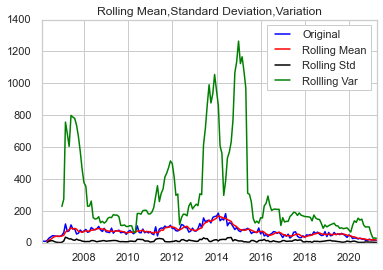

In [144]:
test_stationarity(dfm)

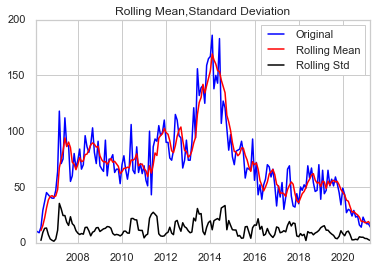

In [146]:
test_stationarity(dfm)

In [153]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print('Null Hypothesis: Unit Root Present')
    print('Test Statistic < Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print (dfoutput, '\n')

def kpss_test(timeseries, regression='c'):
    # Whether stationary around constant 'c' or trend 'ct
    print ('Results of KPSS Test:')
    print('Null Hypothesis: Data is Stationary/Trend Stationary')
    print('Test Statistic > Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    kpsstest = kpss(timeseries, regression=regression)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value

In [148]:
adf_test(dfm)

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                  -2.082895
p-value                          0.251448
#Lags Used                       2.000000
Number of Observations Used    180.000000
Critical Value 1%               -3.467211
Critical Value 5%               -2.877735
Critical Value 10%              -2.575403
dtype: float64 



In [154]:
kpss_test(dfm, regression='c')

Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null



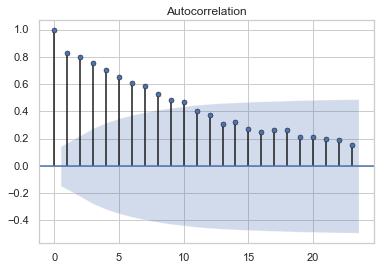

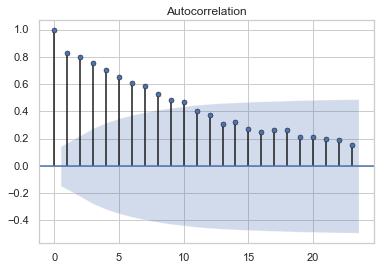

In [155]:
plot_acf(dfm)

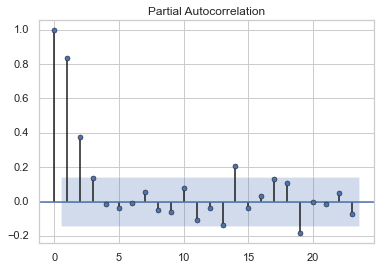

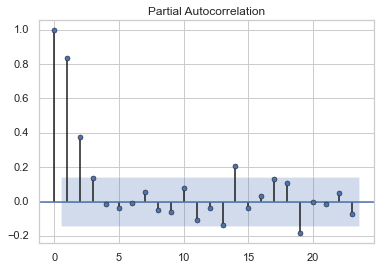

In [156]:
plot_pacf(dfm)

In [158]:
from math import log
from math import exp
from scipy.stats import boxcox
 
# invert a boxcox transform for one value
def invert_boxcox(value, lam):
	# log case
	if lam == 0:
		return exp(value)
	# all other cases
	return exp(log(lam * value + 1) / lam)

In [160]:

# power transform
transformed, lmbda = boxcox(dfm.spillno)
print(transformed, lmbda)
# invert transform
inverted = [invert_boxcox(x, lmbda) for x in transformed]
print(inverted)

[ 4.58250772  4.27934621  3.96036196  5.41624421  8.62763798  9.98585179
 11.20152978 10.90865123 10.60877124 10.45604517 10.45604517 11.48787109
 13.70705365 19.23861221 14.5321803  14.98518609 18.69912017 16.27509634
 16.27509634 12.57556945 13.21486549 15.53452524 14.06602147 14.87310819
 15.96155796 13.94728954 14.41691773 17.18411946 16.17120236 15.64228113
 16.3783858  17.86157974 15.64228113 14.5321803  16.68472881 14.30081613
 13.94728954 13.70705365 16.78570057 13.21486549 14.98518609 14.98518609
 15.42608332 13.58550615 13.94728954 13.94728954 12.31161859 14.41691773
 15.31694222 13.94728954 12.83469074 14.18385707 18.14474467 13.82764072
 13.46297513 16.17120236 13.58550615 14.5321803  13.46297513 14.30081613
 12.70571743 12.0425606  17.57419574 10.90865123 16.17120236 16.88611666
 16.68472881 18.05081384 17.18411946 17.47743067 18.51604211 16.58319213
 16.58319213 15.09650785 14.87310819 15.85578533 18.9706527  18.51604211
 17.18411946 16.98598604 14.06602147 14.87310819 16

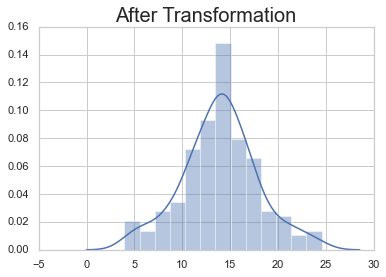

In [166]:
plt.title('After Transformation', fontsize = 20)
sns.distplot(transformed)

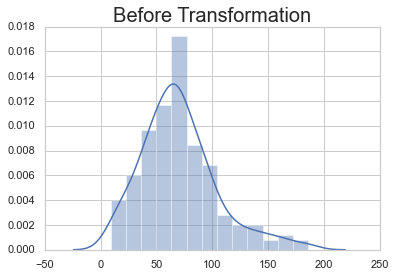

In [167]:
plt.title('Before Transformation', fontsize = 20)
sns.distplot(dfm)

test for normality

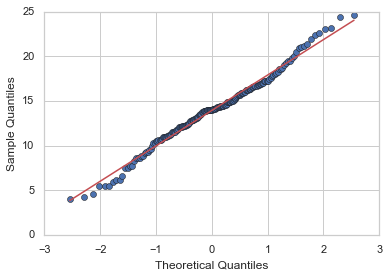

In [172]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = transformed
# q-q plot
qqplot(data, line='s')
pyplot.show()

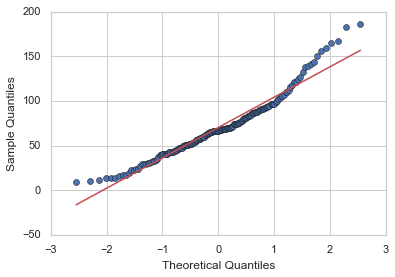

In [169]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = dfm.spillno
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [173]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# generate univariate observations
data = transformed
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.988, p=0.140
Sample looks Gaussian (fail to reject H0)


In [174]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# generate univariate observations
data = dfm.spillno
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.952, p=0.000
Sample does not look Gaussian (reject H0)


In [175]:
adf_test(transformed)

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                  -2.296055
p-value                          0.173243
#Lags Used                       2.000000
Number of Observations Used    180.000000
Critical Value 1%               -3.467211
Critical Value 5%               -2.877735
Critical Value 10%              -2.575403
dtype: float64 



In [178]:
len(dfm)

183

In [180]:
n_test = 3
train, test = dfm[:-n_test], dfm[-n_test:]

In [182]:
len(train)

180

In [183]:
# power transform
transformed, lmbda = boxcox(train.spillno)
print(transformed, lmbda)
# invert transform
inverted = [invert_boxcox(x, lmbda) for x in transformed]
print(inverted)

[ 4.45687644  4.1673008   3.86201512  5.25061032  8.27803455  9.54682998
 10.67763632 10.40559613 10.1267997   9.98471092  9.98471092 10.94337382
 12.99566137 18.06438817 13.75572034 14.17236068 17.57258362 15.35635546
 15.35635546 11.95081474 12.5415388  14.67701292 13.32651108 14.0693213
 15.06887517 13.21711215 13.649639   16.1887397  15.26111785 14.77592927
 15.45101769 16.80806573 14.77592927 13.75572034 15.73165019 13.54275567
 13.21711215 12.99566137 15.82410765 12.5415388  14.17236068 14.17236068
 14.57744254 12.8835673  13.21711215 13.21711215 11.7066217  13.649639
 14.47720545 13.21711215 12.19036969 13.43505252 17.06668247 13.10683581
 12.77053121 15.26111785 12.8835673  13.75572034 12.77053121 13.54275567
 12.07115605 11.45752048 16.54544647 10.40559613 15.26111785 15.9160368
 15.73165019 16.98091076 16.1887397  16.45698572 17.40557382 15.63865551
 15.63865551 14.27467827 14.0693213  14.97184866 17.82017706 17.40557382
 16.1887397  16.00744628 13.32651108 14.0693213  15.824

In [184]:
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# invert difference
def invert_difference(orig_data, diff_data, interval):
	return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]
 
# define dataset
data = train.spillno
print(data)
# difference transform
transformed2 = difference(data, 1)
print(transformed2)
# invert difference
inverted = invert_difference(data, transformed2, 1)
print(inverted)

incidentdate
2006-01-31     11
2006-02-28     10
2006-03-31      9
2006-04-30     14
2006-05-31     29
2006-06-30     37
2006-07-31     45
2006-08-31     43
2006-09-30     41
2006-10-31     40
2006-11-30     40
2006-12-31     47
2007-01-31     64
2007-02-28    118
2007-03-31     71
2007-04-30     75
2007-05-31    112
2007-06-30     87
2007-07-31     87
2007-08-31     55
2007-09-30     60
2007-10-31     80
2007-11-30     67
2007-12-31     74
2008-01-31     84
2008-02-29     66
2008-03-31     70
2008-04-30     96
2008-05-31     86
2008-06-30     81
2008-07-31     88
2008-08-31    103
2008-09-30     81
2008-10-31     71
2008-11-30     91
2008-12-31     69
2009-01-31     66
2009-02-28     64
2009-03-31     92
2009-04-30     60
2009-05-31     75
2009-06-30     75
2009-07-31     79
2009-08-31     63
2009-09-30     66
2009-10-31     66
2009-11-30     53
2009-12-31     70
2010-01-31     78
2010-02-28     66
2010-03-31     57
2010-04-30     68
2010-05-31    106
2010-06-30     65
2010-07-31     

In [185]:
transformed2

[-1,
 -1,
 5,
 15,
 8,
 8,
 -2,
 -2,
 -1,
 0,
 7,
 17,
 54,
 -47,
 4,
 37,
 -25,
 0,
 -32,
 5,
 20,
 -13,
 7,
 10,
 -18,
 4,
 26,
 -10,
 -5,
 7,
 15,
 -22,
 -10,
 20,
 -22,
 -3,
 -2,
 28,
 -32,
 15,
 0,
 4,
 -16,
 3,
 0,
 -13,
 17,
 8,
 -12,
 -9,
 11,
 38,
 -41,
 -3,
 24,
 -23,
 8,
 -9,
 7,
 -13,
 -5,
 49,
 -57,
 43,
 7,
 -2,
 14,
 -9,
 3,
 11,
 -20,
 0,
 -14,
 -2,
 9,
 32,
 -5,
 -14,
 -2,
 -27,
 7,
 18,
 -18,
 0,
 15,
 32,
 -27,
 62,
 -24,
 7,
 2,
 -16,
 34,
 6,
 2,
 19,
 -48,
 12,
 -7,
 40,
 -76,
 20,
 -6,
 -19,
 -19,
 14,
 -20,
 -7,
 12,
 1,
 1,
 7,
 -10,
 -23,
 9,
 -1,
 -1,
 28,
 -37,
 16,
 -29,
 9,
 -13,
 13,
 5,
 13,
 -2,
 -9,
 7,
 -14,
 -19,
 18,
 -10,
 13,
 -24,
 11,
 25,
 3,
 -27,
 -9,
 -1,
 12,
 -9,
 15,
 -3,
 5,
 -3,
 20,
 -11,
 9,
 -13,
 -8,
 1,
 23,
 -31,
 26,
 -21,
 3,
 18,
 -14,
 6,
 -6,
 8,
 -6,
 -8,
 -11,
 15,
 -6,
 -16,
 3,
 -1,
 -5,
 5,
 -6,
 1,
 -8,
 -2,
 9,
 -4]

In [186]:
adf_test(transformed2)

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                -1.392251e+01
p-value                        5.264210e-26
#Lags Used                     1.000000e+00
Number of Observations Used    1.770000e+02
Critical Value 1%             -3.467845e+00
Critical Value 5%             -2.878012e+00
Critical Value 10%            -2.575551e+00
dtype: float64 



In [187]:
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# invert difference
def invert_difference(orig_data, diff_data, interval):
	return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]
 
# define dataset
data = transformed
print(data)
# difference transform
transformed3 = difference(data, 1)
print(transformed2)
# invert difference
inverted = invert_difference(data, transformed3, 1)
print(inverted)

[ 4.45687644  4.1673008   3.86201512  5.25061032  8.27803455  9.54682998
 10.67763632 10.40559613 10.1267997   9.98471092  9.98471092 10.94337382
 12.99566137 18.06438817 13.75572034 14.17236068 17.57258362 15.35635546
 15.35635546 11.95081474 12.5415388  14.67701292 13.32651108 14.0693213
 15.06887517 13.21711215 13.649639   16.1887397  15.26111785 14.77592927
 15.45101769 16.80806573 14.77592927 13.75572034 15.73165019 13.54275567
 13.21711215 12.99566137 15.82410765 12.5415388  14.17236068 14.17236068
 14.57744254 12.8835673  13.21711215 13.21711215 11.7066217  13.649639
 14.47720545 13.21711215 12.19036969 13.43505252 17.06668247 13.10683581
 12.77053121 15.26111785 12.8835673  13.75572034 12.77053121 13.54275567
 12.07115605 11.45752048 16.54544647 10.40559613 15.26111785 15.9160368
 15.73165019 16.98091076 16.1887397  16.45698572 17.40557382 15.63865551
 15.63865551 14.27467827 14.0693213  14.97184866 17.82017706 17.40557382
 16.1887397  16.00744628 13.32651108 14.0693213  15.824

In [188]:
adf_test(transformed3)

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                -1.336798e+01
p-value                        5.266528e-25
#Lags Used                     1.000000e+00
Number of Observations Used    1.770000e+02
Critical Value 1%             -3.467845e+00
Critical Value 5%             -2.878012e+00
Critical Value 10%            -2.575551e+00
dtype: float64 



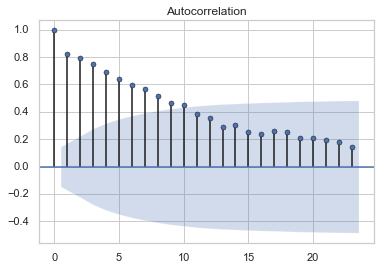

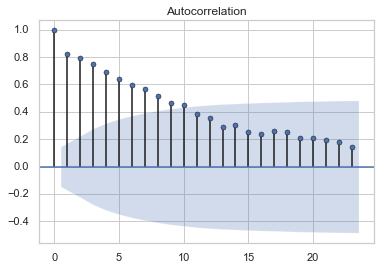

In [196]:
plot_acf(train)

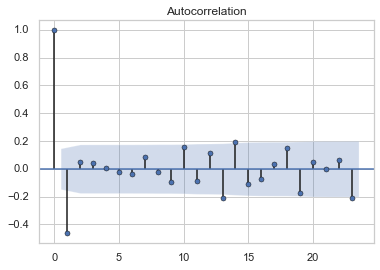

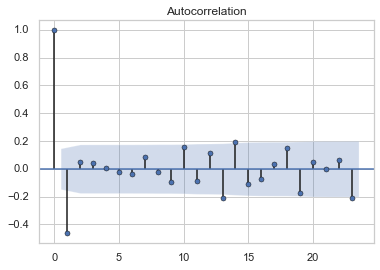

In [212]:
plot_acf(t2)

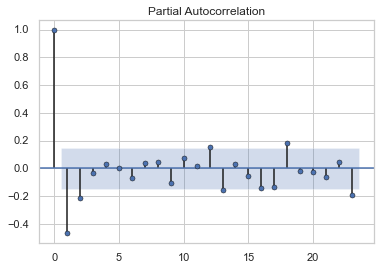

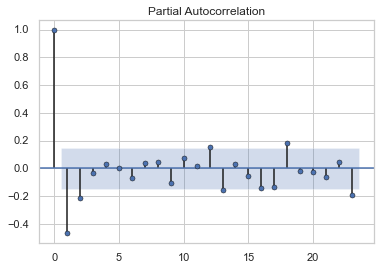

In [213]:
plot_pacf(t2)

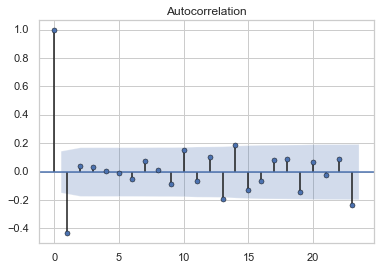

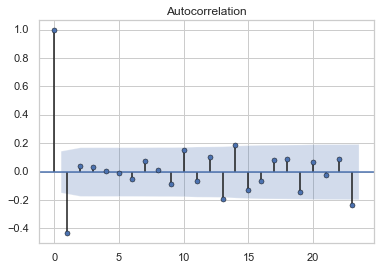

In [214]:
plot_acf(t3)

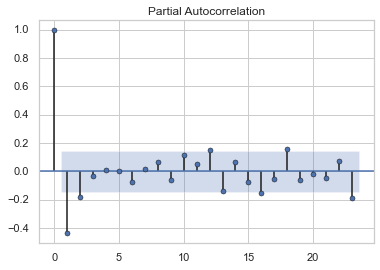

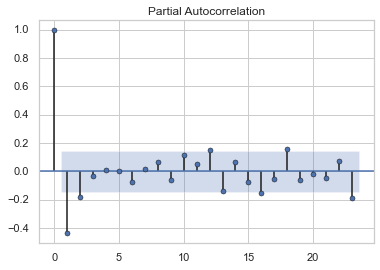

In [215]:
plot_pacf(t3)

In [205]:
dfm1 = train.reset_index()

In [206]:
dfm1 = dfm1[1:]

In [207]:
dfm1

incidentdate  spillno
1     2006-02-28       10
2     2006-03-31        9
3     2006-04-30       14
4     2006-05-31       29
5     2006-06-30       37
6     2006-07-31       45
7     2006-08-31       43
8     2006-09-30       41
9     2006-10-31       40
10    2006-11-30       40
11    2006-12-31       47
12    2007-01-31       64
13    2007-02-28      118
14    2007-03-31       71
15    2007-04-30       75
16    2007-05-31      112
17    2007-06-30       87
18    2007-07-31       87
19    2007-08-31       55
20    2007-09-30       60
21    2007-10-31       80
22    2007-11-30       67
23    2007-12-31       74
24    2008-01-31       84
25    2008-02-29       66
26    2008-03-31       70
27    2008-04-30       96
28    2008-05-31       86
29    2008-06-30       81
30    2008-07-31       88
31    2008-08-31      103
32    2008-09-30       81
33    2008-10-31       71
34    2008-11-30       91
35    2008-12-31       69
36    2009-01-31       66
37    2009-02-28       64
38    2009-03-31       92
39    2009-04-30       60
40    2009-05-31       75
41    2009-06-30       75
42    2009-07-31       79
43    2009-08-31       63
44    2009-09-30       66
45    2009-10-31       66
46    2009-11-30       53
47    2009-12-31       70
48    2010-01-31       78
49    2010-02-28       66
50    2010-03-31       57
51    2010-04-30       68
52    2010-05-31      106
53    2010-06-30       65
54    2010-07-31       62
55    2010-08-31       86
56    2010-09-30       63
57    2010-10-31       71
58    2010-11-30       62
59    2010-12-31       69
60    2011-01-31       56
61    2011-02-28       51
62    2011-03-31      100
63    2011-04-30       43
64    2011-05-31       86
65    2011-06-30       93
66    2011-07-31       91
67    2011-08-31      105
68    2011-09-30       96
69    2011-10-31       99
70    2011-11-30      110
71    2011-12-31       90
72    2012-01-31       90
73    2012-02-29       76
74    2012-03-31       74
75    2012-04-30       83
76    2012-05-31      115
77    2012-06-30      110
78    2012-07-31       96
79    2012-08-31       94
80    2012-09-30       67
81    2012-10-31       74
82    2012-11-30       92
83    2012-12-31       74
84    2013-01-31       74
85    2013-02-28       89
86    2013-03-31      121
87    2013-04-30       94
88    2013-05-31      156
89    2013-06-30      132
90    2013-07-31      139
91    2013-08-31      141
92    2013-09-30      125
93    2013-10-31      159
94    2013-11-30      165
95    2013-12-31      167
96    2014-01-31      186
97    2014-02-28      138
98    2014-03-31      150
99    2014-04-30      143
100   2014-05-31      183
101   2014-06-30      107
102   2014-07-31      127
103   2014-08-31      121
104   2014-09-30      102
105   2014-10-31       83
106   2014-11-30       97
107   2014-12-31       77
108   2015-01-31       70
109   2015-02-28       82
110   2015-03-31       83
111   2015-04-30       84
112   2015-05-31       91
113   2015-06-30       81
114   2015-07-31       58
115   2015-08-31       67
116   2015-09-30       66
117   2015-10-31       65
118   2015-11-30       93
119   2015-12-31       56
120   2016-01-31       72
121   2016-02-29       43
122   2016-03-31       52
123   2016-04-30       39
124   2016-05-31       52
125   2016-06-30       57
126   2016-07-31       70
127   2016-08-31       68
128   2016-09-30       59
129   2016-10-31       66
130   2016-11-30       52
131   2016-12-31       33
132   2017-01-31       51
133   2017-02-28       41
134   2017-03-31       54
135   2017-04-30       30
136   2017-05-31       41
137   2017-06-30       66
138   2017-07-31       69
139   2017-08-31       42
140   2017-09-30       33
141   2017-10-31       32
142   2017-11-30       44
143   2017-12-31       35
144   2018-01-31       50
145   2018-02-28       47
146   2018-03-31       52
147   2018-04-30       49
148   2018-05-31       69
149   2018-06-30       58
150   2018-07-31       67
151   2018-08-31       54
152   2018-09-30       46
153   2018-10-31       47


In [208]:
t2 = pd.Series(transformed2, index = dfm1.incidentdate)

In [209]:
t2

incidentdate
2006-02-28    -1
2006-03-31    -1
2006-04-30     5
2006-05-31    15
2006-06-30     8
2006-07-31     8
2006-08-31    -2
2006-09-30    -2
2006-10-31    -1
2006-11-30     0
2006-12-31     7
2007-01-31    17
2007-02-28    54
2007-03-31   -47
2007-04-30     4
2007-05-31    37
2007-06-30   -25
2007-07-31     0
2007-08-31   -32
2007-09-30     5
2007-10-31    20
2007-11-30   -13
2007-12-31     7
2008-01-31    10
2008-02-29   -18
2008-03-31     4
2008-04-30    26
2008-05-31   -10
2008-06-30    -5
2008-07-31     7
2008-08-31    15
2008-09-30   -22
2008-10-31   -10
2008-11-30    20
2008-12-31   -22
2009-01-31    -3
2009-02-28    -2
2009-03-31    28
2009-04-30   -32
2009-05-31    15
2009-06-30     0
2009-07-31     4
2009-08-31   -16
2009-09-30     3
2009-10-31     0
2009-11-30   -13
2009-12-31    17
2010-01-31     8
2010-02-28   -12
2010-03-31    -9
2010-04-30    11
2010-05-31    38
2010-06-30   -41
2010-07-31    -3
2010-08-31    24
2010-09-30   -23
2010-10-31     8
2010-11-30    -9
2

In [210]:
t3 = pd.Series(transformed3, index = dfm1.incidentdate)

In [211]:
t3

incidentdate
2006-02-28   -0.289576
2006-03-31   -0.305286
2006-04-30    1.388595
2006-05-31    3.027424
2006-06-30    1.268795
2006-07-31    1.130806
2006-08-31   -0.272040
2006-09-30   -0.278796
2006-10-31   -0.142089
2006-11-30    0.000000
2006-12-31    0.958663
2007-01-31    2.052288
2007-02-28    5.068727
2007-03-31   -4.308668
2007-04-30    0.416640
2007-05-31    3.400223
2007-06-30   -2.216228
2007-07-31    0.000000
2007-08-31   -3.405541
2007-09-30    0.590724
2007-10-31    2.135474
2007-11-30   -1.350502
2007-12-31    0.742810
2008-01-31    0.999554
2008-02-29   -1.851763
2008-03-31    0.432527
2008-04-30    2.539101
2008-05-31   -0.927622
2008-06-30   -0.485189
2008-07-31    0.675088
2008-08-31    1.357048
2008-09-30   -2.032136
2008-10-31   -1.020209
2008-11-30    1.975930
2008-12-31   -2.188895
2009-01-31   -0.325644
2009-02-28   -0.221451
2009-03-31    2.828446
2009-04-30   -3.282569
2009-05-31    1.630822
2009-06-30    0.000000
2009-07-31    0.405082
2009-08-31   -1.69387

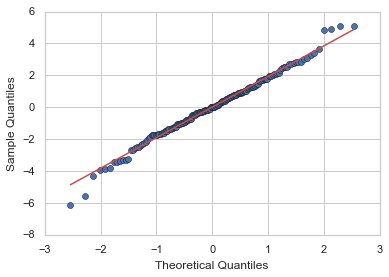

In [217]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = t3
# q-q plot
qqplot(data, line='s')
pyplot.show()

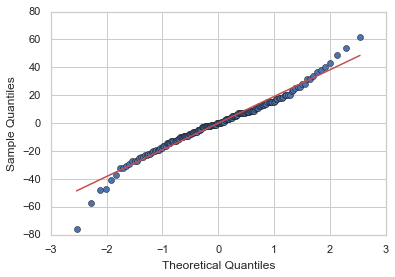

In [218]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = t2
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [219]:
# grid search simple forecast for oil spill numbers
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from pandas import read_csv
 
# one-step simple forecast
def simple_forecast(history, config):
	n, offset, avg_type = config
	# persist value, ignore other config
	if avg_type == 'persist':
		return history[-n]
	# collect values to average
	values = list()
	if offset == 1:
		values = history[-n:]
	else:
		# skip bad configs
		if n*offset > len(history):
			raise Exception('Config beyond end of data: %d %d' % (n,offset))
		# try and collect n values using offset
		for i in range(1, n+1):
			ix = i * offset
			values.append(history[-ix])
	# check if we can average
	if len(values) < 2:
		raise Exception('Cannot calculate average')
	# mean of last n values
	if avg_type == 'mean':
		return mean(values)
	# median of last n values
	return median(values)
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = simple_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of simple configs to try
def simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12]):
	configs = list()
	for i in range(1, max_length+1):
		for o in offsets:
			for t in ['persist', 'mean', 'median']:
				cfg = [i, o, t]
				configs.append(cfg)
	return configs
 
if __name__ == '__main__':
	# define dataset
	series = dfm
	data = series.values
	print(data)
	# data split
	n_test = 3
	# model configs
	max_length = len(data) - n_test
	cfg_list = simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

[[ 11]
 [ 10]
 [  9]
 [ 14]
 [ 29]
 [ 37]
 [ 45]
 [ 43]
 [ 41]
 [ 40]
 [ 40]
 [ 47]
 [ 64]
 [118]
 [ 71]
 [ 75]
 [112]
 [ 87]
 [ 87]
 [ 55]
 [ 60]
 [ 80]
 [ 67]
 [ 74]
 [ 84]
 [ 66]
 [ 70]
 [ 96]
 [ 86]
 [ 81]
 [ 88]
 [103]
 [ 81]
 [ 71]
 [ 91]
 [ 69]
 [ 66]
 [ 64]
 [ 92]
 [ 60]
 [ 75]
 [ 75]
 [ 79]
 [ 63]
 [ 66]
 [ 66]
 [ 53]
 [ 70]
 [ 78]
 [ 66]
 [ 57]
 [ 68]
 [106]
 [ 65]
 [ 62]
 [ 86]
 [ 63]
 [ 71]
 [ 62]
 [ 69]
 [ 56]
 [ 51]
 [100]
 [ 43]
 [ 86]
 [ 93]
 [ 91]
 [105]
 [ 96]
 [ 99]
 [110]
 [ 90]
 [ 90]
 [ 76]
 [ 74]
 [ 83]
 [115]
 [110]
 [ 96]
 [ 94]
 [ 67]
 [ 74]
 [ 92]
 [ 74]
 [ 74]
 [ 89]
 [121]
 [ 94]
 [156]
 [132]
 [139]
 [141]
 [125]
 [159]
 [165]
 [167]
 [186]
 [138]
 [150]
 [143]
 [183]
 [107]
 [127]
 [121]
 [102]
 [ 83]
 [ 97]
 [ 77]
 [ 70]
 [ 82]
 [ 83]
 [ 84]
 [ 91]
 [ 81]
 [ 58]
 [ 67]
 [ 66]
 [ 65]
 [ 93]
 [ 56]
 [ 72]
 [ 43]
 [ 52]
 [ 39]
 [ 52]
 [ 57]
 [ 70]
 [ 68]
 [ 59]
 [ 66]
 [ 52]
 [ 33]
 [ 51]
 [ 41]
 [ 54]
 [ 30]
 [ 41]
 [ 66]
 [ 69]
 [ 42]
 [ 33]
 [ 32]
 [ 44]

In [221]:
# grid search simple forecast for monthly oil spill numbers
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# one-step simple forecast
def simple_forecast(history, config):
	n, offset, avg_type = config
	# persist value, ignore other config
	if avg_type == 'persist':
		return history[-n]
	# collect values to average
	values = list()
	if offset == 1:
		values = history[-n:]
	else:
		# skip bad configs
		if n*offset > len(history):
			raise Exception('Config beyond end of data: %d %d' % (n,offset))
		# try and collect n values using offset
		for i in range(1, n+1):
			ix = i * offset
			values.append(history[-ix])
	# check if we can average
	if len(values) < 2:
		raise Exception('Cannot calculate average')
	# mean of last n values
	if avg_type == 'mean':
		return mean(values)
	# median of last n values
	return median(values)

# root mean squared error or rmse
#def measure_rmse(actual, predicted):
	#return sqrt(mean_squared_error(actual, predicted))

# mean absolute percentage error
def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted)/actual)) * 100

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = simple_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = mean_absolute_percentage_error(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of simple configs to try
def simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12]):
	configs = list()
	for i in range(1, max_length+1):
		for o in offsets:
			for t in ['persist', 'mean', 'median']:
				cfg = [i, o, t]
				configs.append(cfg)
	return configs

if __name__ == '__main__':
	# define dataset
	#series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
	series = read_csv('monthly2.csv', header=0, index_col=0)
	data = series.values
	# data split
	n_test = 3
	# model configs
	max_length = len(data) - n_test
	cfg_list = simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 10 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

 > Model[[1, 1, 'persist']] 26.687
 > Model[[1, 2, 'persist']] 26.687
 > Model[[1, 3, 'persist']] 26.687
 > Model[[1, 4, 'persist']] 26.687
 > Model[[1, 5, 'persist']] 26.687
 > Model[[1, 6, 'persist']] 26.687
 > Model[[1, 7, 'persist']] 26.687
 > Model[[1, 8, 'persist']] 26.687
 > Model[[1, 9, 'persist']] 26.687
 > Model[[1, 10, 'persist']] 26.687
 > Model[[1, 11, 'persist']] 26.687
 > Model[[1, 12, 'persist']] 26.687
 > Model[[2, 1, 'persist']] 38.783
 > Model[[2, 1, 'mean']] 19.217
 > Model[[2, 1, 'median']] 19.217
 > Model[[2, 2, 'persist']] 38.783
 > Model[[2, 2, 'mean']] 32.455
 > Model[[2, 2, 'median']] 32.455
 > Model[[2, 3, 'persist']] 38.783
 > Model[[2, 3, 'mean']] 41.541
 > Model[[2, 3, 'median']] 41.541
 > Model[[2, 4, 'persist']] 38.783
 > Model[[2, 4, 'mean']] 58.136
 > Model[[2, 4, 'median']] 58.136
 > Model[[2, 5, 'persist']] 38.783
 > Model[[2, 5, 'mean']] 89.373
 > Model[[2, 5, 'median']] 89.373
 > Model[[2, 6, 'persist']] 38.783
 > Model[[2, 6, 'mean']] 104.991
 > M

In [225]:
# grid search simple forecast for monthly oil spill numbers
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# one-step simple forecast
def simple_forecast(history, config):
	n, offset, avg_type = config
	# persist value, ignore other config
	if avg_type == 'persist':
		return history[-n]
	# collect values to average
	values = list()
	if offset == 1:
		values = history[-n:]
	else:
		# skip bad configs
		if n*offset > len(history):
			raise Exception('Config beyond end of data: %d %d' % (n,offset))
		# try and collect n values using offset
		for i in range(1, n+1):
			ix = i * offset
			values.append(history[-ix])
	# check if we can average
	if len(values) < 2:
		raise Exception('Cannot calculate average')
	# mean of last n values
	if avg_type == 'mean':
		return mean(values)
	# median of last n values
	return median(values)

# root mean squared error or rmse
#def measure_rmse(actual, predicted):
	#return sqrt(mean_squared_error(actual, predicted))

# mean absolute percentage error
def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted)/actual)) * 100

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = simple_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = mean_absolute_percentage_error(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of simple configs to try
def simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12]):
	configs = list()
	for i in range(1, max_length+1):
		for o in offsets:
			for t in ['persist', 'mean', 'median']:
				cfg = [i, o, t]
				configs.append(cfg)
	return configs

if __name__ == '__main__':
	# define dataset
	#series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
	#series = read_csv('monthly2.csv', header=0, index_col=0)
	series = dfm    
	data = series.values
	# data split
	n_test = 3
	# model configs
	max_length = len(data) - n_test
	cfg_list = simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 10 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

 > Model[[1, 1, 'persist']] 11.064
 > Model[[1, 2, 'persist']] 11.064
 > Model[[1, 3, 'persist']] 11.064
 > Model[[1, 4, 'persist']] 11.064
 > Model[[1, 5, 'persist']] 11.064
 > Model[[1, 6, 'persist']] 11.064
 > Model[[1, 7, 'persist']] 11.064
 > Model[[1, 8, 'persist']] 11.064
 > Model[[1, 9, 'persist']] 11.064
 > Model[[1, 10, 'persist']] 11.064
 > Model[[1, 11, 'persist']] 11.064
 > Model[[1, 12, 'persist']] 11.064
 > Model[[2, 1, 'persist']] 22.829
 > Model[[2, 1, 'mean']] 17.647
 > Model[[2, 1, 'median']] 17.647
 > Model[[2, 2, 'persist']] 22.829
 > Model[[2, 2, 'mean']] 18.954
 > Model[[2, 2, 'median']] 18.954
 > Model[[2, 3, 'persist']] 22.829
 > Model[[2, 3, 'mean']] 25.000
 > Model[[2, 3, 'median']] 25.000
 > Model[[2, 4, 'persist']] 22.829
 > Model[[2, 4, 'mean']] 35.504
 > Model[[2, 4, 'median']] 35.504
 > Model[[2, 5, 'persist']] 22.829
 > Model[[2, 5, 'mean']] 43.908
 > Model[[2, 5, 'median']] 43.908
 > Model[[2, 6, 'persist']] 22.829
 > Model[[2, 6, 'mean']] 71.218
 > Mo

In [229]:
# grid search simple forecast for monthly oil spill numbers
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# one-step simple forecast
def simple_forecast(history, config):
	n, offset, avg_type = config
	# persist value, ignore other config
	if avg_type == 'persist':
		return history[-n]
	# collect values to average
	values = list()
	if offset == 1:
		values = history[-n:]
	else:
		# skip bad configs
		if n*offset > len(history):
			raise Exception('Config beyond end of data: %d %d' % (n,offset))
		# try and collect n values using offset
		for i in range(1, n+1):
			ix = i * offset
			values.append(history[-ix])
	# check if we can average
	if len(values) < 2:
		raise Exception('Cannot calculate average')
	# mean of last n values
	if avg_type == 'mean':
		return mean(values)
	# median of last n values
	return median(values)

# root mean squared error or rmse
#def measure_rmse(actual, predicted):
	#return sqrt(mean_squared_error(actual, predicted))

# mean absolute percentage error
def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted)/actual)) * 100

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = simple_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = mean_absolute_percentage_error(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of simple configs to try
def simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12]):
	configs = list()
	for i in range(1, max_length+1):
		for o in offsets:
			for t in ['persist', 'mean', 'median']:
				cfg = [i, o, t]
				configs.append(cfg)
	return configs

if __name__ == '__main__':
	# define dataset
	#series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
	#series = read_csv('monthly2.csv', header=0, index_col=0)
	series = dfm    
	data = series.values
	# data split
	n_test = 6
	# model configs
	max_length = len(data) - n_test
	cfg_list = simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 10 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

 > Model[[1, 1, 'persist']] 17.944
 > Model[[1, 2, 'persist']] 17.944
 > Model[[1, 3, 'persist']] 17.944
 > Model[[1, 4, 'persist']] 17.944
 > Model[[1, 5, 'persist']] 17.944
 > Model[[1, 6, 'persist']] 17.944
 > Model[[1, 7, 'persist']] 17.944
 > Model[[1, 8, 'persist']] 17.944
 > Model[[1, 9, 'persist']] 17.944
 > Model[[1, 10, 'persist']] 17.944
 > Model[[1, 11, 'persist']] 17.944
 > Model[[1, 12, 'persist']] 17.944
 > Model[[2, 1, 'persist']] 32.778
 > Model[[2, 1, 'mean']] 18.854
 > Model[[2, 1, 'median']] 18.854
 > Model[[2, 2, 'persist']] 32.778
 > Model[[2, 2, 'mean']] 25.871
 > Model[[2, 2, 'median']] 25.871
 > Model[[2, 3, 'persist']] 32.778
 > Model[[2, 3, 'mean']] 33.880
 > Model[[2, 3, 'median']] 33.880
 > Model[[2, 4, 'persist']] 32.778
 > Model[[2, 4, 'mean']] 45.218
 > Model[[2, 4, 'median']] 45.218
 > Model[[2, 5, 'persist']] 32.778
 > Model[[2, 5, 'mean']] 65.526
 > Model[[2, 5, 'median']] 65.526
 > Model[[2, 6, 'persist']] 32.778
 > Model[[2, 6, 'mean']] 84.746
 > Mo

In [1]:
# grid search simple forecasts
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
 
# one-step simple forecast
def simple_forecast(history, config):
	n, offset, avg_type = config
	# persist value, ignore other config
	if avg_type == 'persist':
		return history[-n]
	# collect values to average
	values = list()
	if offset == 1:
		values = history[-n:]
	else:
		# skip bad configs
		if n*offset > len(history):
			raise Exception('Config beyond end of data: %d %d' % (n,offset))
		# try and collect n values using offset
		for i in range(1, n+1):
			ix = i * offset
			values.append(history[-ix])
	# check if we can average
	if len(values) < 2:
		raise Exception('Cannot calculate average')
	# mean of last n values
	if avg_type == 'mean':
		return mean(values)
	# median of last n values
	return median(values)
 
# root mean squared error or rmse
#def measure_rmse(actual, predicted):
#	return sqrt(mean_squared_error(actual, predicted))

def mean_absolute_percentage_error(actual, predicted):
	return np.mean(np.abs((actual - predicted)/actual)) * 100

 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = simple_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = mean_absolute_percentage_error(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of simple configs to try
def simple_configs(max_length, offsets=[1]):
	configs = list()
	for i in range(1, max_length+1):
		for o in offsets:
			for t in ['persist', 'mean', 'median']:
				cfg = [i, o, t]
				configs.append(cfg)
	return configs
 
if __name__ == '__main__':
	# define dataset
	data = dfm
#	print(data)
	# data split
	n_test = 3
	# model configs
	max_length = len(data) - n_test
	cfg_list = simple_configs(max_length)
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

NameError: name 'dfm' is not defined

In [226]:
series = read_csv('monthly2.csv', header=0, index_col=0)

In [227]:
series.tail()

spillno
incidentdate         
2020-08-31         24
2020-09-30         16
2020-10-31         14
2020-11-30         22
2020-12-31         17

In [228]:
dfm.tail()

spillno
incidentdate         
2020-11-30         23
2020-12-31         19
2021-01-31         17
2021-02-28         17
2021-03-31         14

In [2]:
# grid search simple forecast for monthly oil spill numbers
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# one-step simple forecast
def simple_forecast(history, config):
	n, offset, avg_type = config
	# persist value, ignore other config
	if avg_type == 'persist':
		return history[-n]
	# collect values to average
	values = list()
	if offset == 1:
		values = history[-n:]
	else:
		# skip bad configs
		if n*offset > len(history):
			raise Exception('Config beyond end of data: %d %d' % (n,offset))
		# try and collect n values using offset
		for i in range(1, n+1):
			ix = i * offset
			values.append(history[-ix])
	# check if we can average
	if len(values) < 2:
		raise Exception('Cannot calculate average')
	# mean of last n values
	if avg_type == 'mean':
		return mean(values)
	# median of last n values
	return median(values)

# root mean squared error or rmse
#def measure_rmse(actual, predicted):
	#return sqrt(mean_squared_error(actual, predicted))

# mean absolute percentage error
def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted)/actual)) * 100

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = simple_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = mean_absolute_percentage_error(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of simple configs to try
def simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12]):
	configs = list()
	for i in range(1, max_length+1):
		for o in offsets:
			for t in ['persist', 'mean', 'median']:
				cfg = [i, o, t]
				configs.append(cfg)
	return configs

if __name__ == '__main__':
	# define dataset
	#series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
	#series = read_csv('monthly2.csv', header=0, index_col=0)
	series = dfm    
	data = t2
	# data split
	n_test = 3
	# model configs
	max_length = len(data) - n_test
	cfg_list = simple_configs(max_length, offsets=[1,2,3,4,5,6,7,8,9,10,11,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 10 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

NameError: name 'dfm' is not defined

#Original dataframe - dfm

#train - original series
#Boxcox transformed (0.49230600339112635) - transformed
#transformed2/t2- difference of original series
#transformed3/t3- boxcox transformed + difference

In [ ]:
#original dataframe - dfm
#train - original series
#transformed - boxcox transformed (0.49230600339112635)
#transformed2/t2 - difference of original series
#transformed3/t3 - boxcox transformed + difference